In [325]:
#pip install scikeras

In [326]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import os as os
import matplotlib.pyplot as plt
import gc 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (RandomizedSearchCV,GridSearchCV, TimeSeriesSplit, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import metrics, tree
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tools.eval_measures import mse, rmse
import itertools
import warnings
import time
import plotly.express as px
from scipy.stats import norm
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from typing import Dict, Iterable, Any
from keras.callbacks import History 
import panel as pn
pn.extension('plotly')
import hvplot.pandas

In [327]:
def glimpse(df):
    # Print the number of rows and columns in the dataframe
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    # Display the first five rows of the dataframe
    display(df.head())
    # Display the last five rows of the dataframe
    display(df.tail())

In [328]:
df_Ire = pd.concat([pd.read_csv('1991-2004.csv'),pd.read_csv('2005-2014.csv'),pd.read_csv('2015-2021.csv')])

In [329]:
glimpse(df_Ire)

1302 rows and 7 columns


,Statistic Label,Region,Type of Animal,Year,UNIT,VALUE,STATISTIC Label
0,Number of Livestock in June (1991 - 2004),Border,Total cattle,1991,000 Head,916.5,NaN
1,Number of Livestock in June (1991 - 2004),Border,Total cattle,1992,000 Head,924.3,NaN
2,Number of Livestock in June (1991 - 2004),Border,Total cattle,1993,000 Head,928.4,NaN
3,Number of Livestock in June (1991 - 2004),Border,Total cattle,1994,000 Head,934.0,NaN
4,Number of Livestock in June (1991 - 2004),Border,Total cattle,1995,000 Head,933.6,NaN


,Statistic Label,Region,Type of Animal,Year,UNIT,VALUE,STATISTIC Label
289,NaN,Mid-West,Total goats,2021,000 Head,1.9,Number of Livestock in June
290,NaN,South-East,Total goats,2021,000 Head,0.7,Number of Livestock in June
291,NaN,South-West,Total goats,2021,000 Head,1.3,Number of Livestock in June
292,NaN,Dublin and Mid-East,Total goats,2021,000 Head,1.4,Number of Livestock in June
293,NaN,Midland,Total goats,2021,000 Head,0.8,Number of Livestock in June


In [330]:
df_Ire = df_Ire.drop(["Statistic Label", "STATISTIC Label","UNIT"], axis=1) #drop columns

In [331]:
glimpse(df_Ire)

1302 rows and 4 columns


,Region,Type of Animal,Year,VALUE
0,Border,Total cattle,1991,916.5
1,Border,Total cattle,1992,924.3
2,Border,Total cattle,1993,928.4
3,Border,Total cattle,1994,934.0
4,Border,Total cattle,1995,933.6


,Region,Type of Animal,Year,VALUE
289,Mid-West,Total goats,2021,1.9
290,South-East,Total goats,2021,0.7
291,South-West,Total goats,2021,1.3
292,Dublin and Mid-East,Total goats,2021,1.4
293,Midland,Total goats,2021,0.8


In [332]:
df_Ire.rename(columns = {'VALUE':'Quantity'}, inplace = True)

In [333]:
df_Ire.head()

,Region,Type of Animal,Year,Quantity
0,Border,Total cattle,1991,916.5
1,Border,Total cattle,1992,924.3
2,Border,Total cattle,1993,928.4
3,Border,Total cattle,1994,934.0
4,Border,Total cattle,1995,933.6


In [334]:
df_Ire.duplicated().sum()

0

In [335]:
df_Ire.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West', 'Dublin and Mid-East'], dtype=object)

In [336]:
df_Ire['Region'] = df_Ire['Region'].str.replace('Dublin and Mid-East', 'Dublin plus Mid East',regex = True)

In [337]:
df_Ire.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [338]:
df_Ire.Year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [339]:
df_Ire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 293
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1302 non-null   object 
 1   Type of Animal  1302 non-null   object 
 2   Year            1302 non-null   int64  
 3   Quantity        1302 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 50.9+ KB


In [340]:
df_Ire.isnull().sum()

Region            0
Type of Animal    0
Year              0
Quantity          0
dtype: int64

In [341]:
df_Ire.shape

(1302, 4)

In [342]:
df_Ire.Quantity.describe()

count    1302.000000
mean      362.713210
std       497.233292
min         0.300000
25%         1.800000
50%        26.900000
75%       699.975000
max      2192.700000
Name: Quantity, dtype: float64

In [343]:
df_Ire.count()

Region            1302
Type of Animal    1302
Year              1302
Quantity          1302
dtype: int64

In [344]:
df_Ire.Quantity.skew(axis = 0)

1.2651456127634129

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



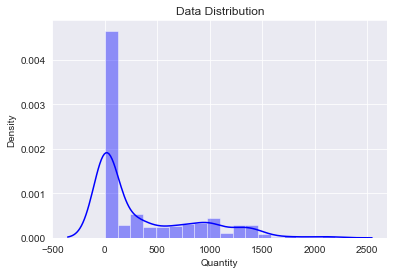

In [345]:
sns.distplot(df_Ire.Quantity, hist=True, color="b", label="Fitted Values")


plt.title('Data Distribution')

plt.show()
plt.close()
sns.set_style("darkgrid")

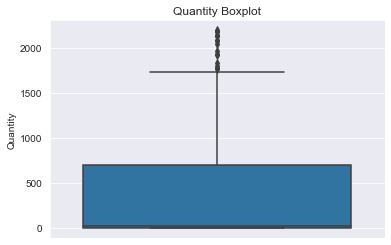

In [346]:
sns.boxplot(y=df_Ire.Quantity); #boxplot graph showing the quantity of outliers present in our data
plt.title('Quantity Boxplot')
sns.set_style("darkgrid")

In [347]:
df_Ire.groupby(['Year'],sort = False)['Quantity'].sum().reset_index()

,Year,Quantity
0,1991,17191.9
1,1992,17326.2
2,1993,17222.3
3,1994,17022.3
4,1995,17006.5
5,1996,16915.1
6,1997,17458.1
7,1998,17865.9
8,1999,17195.8
9,2000,16397.9


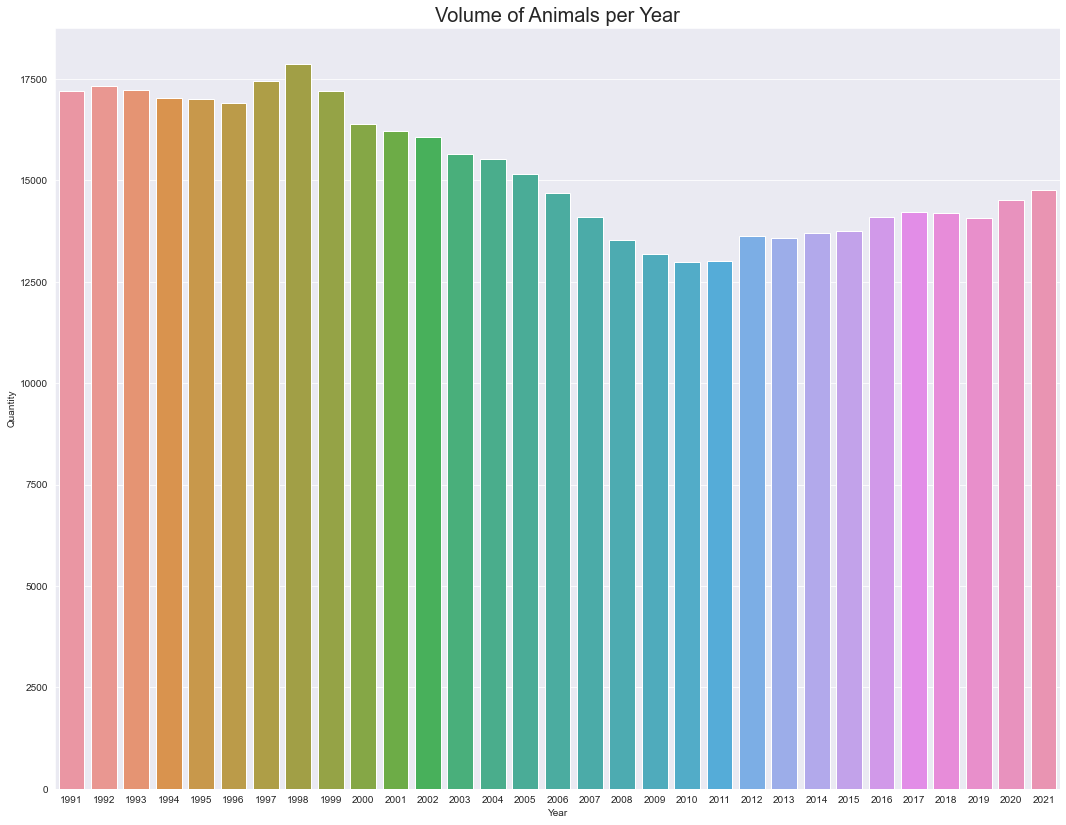

In [348]:
plt.figure(figsize=(18,14))
ax = sns.barplot(x = 'Year', y = 'Quantity', ci = None, data = df_Ire, estimator=sum)
plt.title('Volume of Animals per Year', fontsize=20)
sns.set_style("darkgrid")

In [349]:
df_Ire_mean_temps = pd.read_csv('ireland_mean_temps_1901-2021.csv',skiprows=1)

In [350]:
glimpse(df_Ire_mean_temps)

121 rows and 29 columns


,Unnamed: 0,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,8.84,8.85,8.36,9.33,9.31,8.03,8.74,8.91,9.29,...,8.42,8.42,8.70,8.58,8.26,8.84,9.08,8.60,9.26,8.78
1,1902,8.86,8.89,8.33,9.39,9.40,7.91,8.72,8.93,9.36,...,8.30,8.30,8.72,8.59,8.26,8.91,9.13,8.60,9.30,8.80
2,1903,8.82,8.88,8.28,9.33,9.35,7.89,8.68,8.86,9.31,...,8.29,8.29,8.67,8.52,8.19,8.87,9.12,8.54,9.31,8.78
3,1904,8.80,8.87,8.27,9.30,9.32,7.91,8.68,8.84,9.29,...,8.29,8.29,8.65,8.51,8.18,8.85,9.09,8.53,9.28,8.76
4,1905,9.01,9.04,8.53,9.49,9.49,8.16,8.93,9.08,9.46,...,8.56,8.56,8.88,8.76,8.43,9.03,9.27,8.78,9.45,8.96


,Unnamed: 0,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
116,2017,10.00,10.03,9.53,10.48,10.48,9.18,9.97,10.06,10.44,...,9.55,9.55,9.86,9.74,9.41,10.01,10.25,9.76,10.45,9.98
117,2018,9.70,9.74,9.23,10.17,10.18,8.85,9.68,9.75,10.14,...,9.25,9.25,9.55,9.42,9.11,9.71,9.95,9.46,10.17,9.68
118,2019,9.87,9.88,9.40,10.35,10.34,9.08,9.83,9.93,10.32,...,9.44,9.44,9.72,9.61,9.29,9.87,10.11,9.63,10.31,9.84
119,2020,9.79,9.82,9.31,10.26,10.26,8.97,9.77,9.84,10.23,...,9.34,9.34,9.64,9.51,9.18,9.79,10.04,9.54,10.27,9.78
120,2021,9.95,9.96,9.47,10.43,10.43,9.12,9.89,10.02,10.40,...,9.49,9.49,9.80,9.69,9.37,9.95,10.19,9.70,10.38,9.90


In [351]:
df_Ire_mean_temps.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

In [352]:
df_Ire_mean_temps.head()

,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,8.84,8.85,8.36,9.33,9.31,8.03,8.74,8.91,9.29,...,8.42,8.42,8.70,8.58,8.26,8.84,9.08,8.60,9.26,8.78
1,1902,8.86,8.89,8.33,9.39,9.40,7.91,8.72,8.93,9.36,...,8.30,8.30,8.72,8.59,8.26,8.91,9.13,8.60,9.30,8.80
2,1903,8.82,8.88,8.28,9.33,9.35,7.89,8.68,8.86,9.31,...,8.29,8.29,8.67,8.52,8.19,8.87,9.12,8.54,9.31,8.78
3,1904,8.80,8.87,8.27,9.30,9.32,7.91,8.68,8.84,9.29,...,8.29,8.29,8.65,8.51,8.18,8.85,9.09,8.53,9.28,8.76
4,1905,9.01,9.04,8.53,9.49,9.49,8.16,8.93,9.08,9.46,...,8.56,8.56,8.88,8.76,8.43,9.03,9.27,8.78,9.45,8.96


In [353]:
df_Ire_mean_temps = df_Ire_mean_temps[df_Ire_mean_temps['Year'] >= 1991]

In [354]:
df_Ire_mean_temps = df_Ire_mean_temps.drop(["Ireland"], axis=1) #drop columns

In [355]:
glimpse(df_Ire_mean_temps)

31 rows and 28 columns


,Year,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
90,1991,9.53,9.04,10.01,9.98,8.66,9.39,9.59,9.96,9.46,...,9.04,9.04,9.39,9.27,8.96,9.53,9.74,9.28,9.88,9.43
91,1992,9.48,8.98,9.93,9.93,8.61,9.36,9.51,9.91,9.39,...,9.00,9.00,9.32,9.18,8.87,9.47,9.71,9.21,9.89,9.41
92,1993,9.32,8.75,9.80,9.80,8.36,9.11,9.37,9.78,9.19,...,8.75,8.75,9.15,9.02,8.70,9.31,9.54,9.02,9.70,9.18
93,1994,9.52,8.97,9.98,10.03,8.59,9.37,9.55,9.97,9.41,...,8.97,8.97,9.35,9.21,8.89,9.52,9.77,9.24,9.98,9.45
94,1995,10.07,9.48,10.52,10.54,9.05,9.94,10.09,10.51,9.96,...,9.45,9.45,9.89,9.74,9.38,10.07,10.33,9.77,10.54,10.03


,Year,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
116,2017,10.03,9.53,10.48,10.48,9.18,9.97,10.06,10.44,9.93,...,9.55,9.55,9.86,9.74,9.41,10.01,10.25,9.76,10.45,9.98
117,2018,9.74,9.23,10.17,10.18,8.85,9.68,9.75,10.14,9.63,...,9.25,9.25,9.55,9.42,9.11,9.71,9.95,9.46,10.17,9.68
118,2019,9.88,9.40,10.35,10.34,9.08,9.83,9.93,10.32,9.79,...,9.44,9.44,9.72,9.61,9.29,9.87,10.11,9.63,10.31,9.84
119,2020,9.82,9.31,10.26,10.26,8.97,9.77,9.84,10.23,9.71,...,9.34,9.34,9.64,9.51,9.18,9.79,10.04,9.54,10.27,9.78
120,2021,9.96,9.47,10.43,10.43,9.12,9.89,10.02,10.40,9.87,...,9.49,9.49,9.80,9.69,9.37,9.95,10.19,9.70,10.38,9.90


In [356]:
df_Ire_mean_temps.head()

,Year,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
90,1991,9.53,9.04,10.01,9.98,8.66,9.39,9.59,9.96,9.46,...,9.04,9.04,9.39,9.27,8.96,9.53,9.74,9.28,9.88,9.43
91,1992,9.48,8.98,9.93,9.93,8.61,9.36,9.51,9.91,9.39,...,9.00,9.00,9.32,9.18,8.87,9.47,9.71,9.21,9.89,9.41
92,1993,9.32,8.75,9.80,9.80,8.36,9.11,9.37,9.78,9.19,...,8.75,8.75,9.15,9.02,8.70,9.31,9.54,9.02,9.70,9.18
93,1994,9.52,8.97,9.98,10.03,8.59,9.37,9.55,9.97,9.41,...,8.97,8.97,9.35,9.21,8.89,9.52,9.77,9.24,9.98,9.45
94,1995,10.07,9.48,10.52,10.54,9.05,9.94,10.09,10.51,9.96,...,9.45,9.45,9.89,9.74,9.38,10.07,10.33,9.77,10.54,10.03


In [357]:
df_Ire_mean_temps = df_Ire_mean_temps.melt(id_vars=["Year"], 
        var_name="County", 
        value_name="Mean_Temperature")

In [358]:
glimpse(df_Ire_mean_temps)

837 rows and 3 columns


,Year,County,Mean_Temperature
0,1991,Carlow,9.53
1,1992,Carlow,9.48
2,1993,Carlow,9.32
3,1994,Carlow,9.52
4,1995,Carlow,10.07


,Year,County,Mean_Temperature
832,2017,Wicklow,9.98
833,2018,Wicklow,9.68
834,2019,Wicklow,9.84
835,2020,Wicklow,9.78
836,2021,Wicklow,9.90


In [359]:
df_Regions = pd.read_excel('Nuts_regions.xlsx',usecols = ['NUTS 3 Name','County'])

In [360]:
glimpse(df_Regions)

26 rows and 2 columns


,NUTS 3 Name,County
0,Border,Donegal
1,Border,Sligo
2,Border,Leitrim
3,Border,Cavan
4,Border,Monaghan


,NUTS 3 Name,County
21,Mid-East,Louth
22,Midlands,Longford
23,Midlands,Westmeath
24,Midlands,Offaly
25,Midlands,Laois


In [361]:
df_Regions.rename(columns = {'NUTS 3 Name':'Region'}, inplace = True)

In [362]:
df_Regions.head()

,Region,County
0,Border,Donegal
1,Border,Sligo
2,Border,Leitrim
3,Border,Cavan
4,Border,Monaghan


In [363]:
df_Ire_mean_temps = pd.merge(df_Ire_mean_temps, df_Regions, how="inner", on=["County"])

In [364]:
glimpse(df_Ire_mean_temps)

806 rows and 4 columns


,Year,County,Mean_Temperature,Region
0,1991,Carlow,9.53,South East
1,1992,Carlow,9.48,South East
2,1993,Carlow,9.32,South East
3,1994,Carlow,9.52,South East
4,1995,Carlow,10.07,South East


,Year,County,Mean_Temperature,Region
801,2017,Wicklow,9.98,Mid-East
802,2018,Wicklow,9.68,Mid-East
803,2019,Wicklow,9.84,Mid-East
804,2020,Wicklow,9.78,Mid-East
805,2021,Wicklow,9.90,Mid-East


In [365]:
df_Ire_mean_temps['Region'] = df_Ire_mean_temps['Region'].str.replace('Dublin', 'Dublin plus Mid East',regex = True)
df_Ire_mean_temps['Region'] = df_Ire_mean_temps['Region'].str.replace('Mid-East', 'Dublin plus Mid East',regex = True)

In [366]:
df_Ire_mean_temps = df_Ire_mean_temps.groupby(['Region','Year'],sort = False)['Mean_Temperature'].mean().reset_index()

In [367]:
glimpse(df_Ire_mean_temps)

217 rows and 3 columns


,Region,Year,Mean_Temperature
0,South East,1991,9.6725
1,South East,1992,9.6475
2,South East,1993,9.4775
3,South East,1994,9.7075
4,South East,1995,10.2650


,Region,Year,Mean_Temperature
212,Midlands,2017,9.8100
213,Midlands,2018,9.5050
214,Midlands,2019,9.6775
215,Midlands,2020,9.5875
216,Midlands,2021,9.7450


In [368]:
df_Ire_prec = pd.read_csv('ireland_precipitation_1901-2021.csv',skiprows=1)

In [369]:
df_Ire_prec.head()

,Unnamed: 0,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,1068.52,983.20,1018.93,1055.24,1153.06,1288.02,942.31,1044.95,1323.52,...,933.47,933.47,851.14,1008.41,1206.83,1030.92,1129.96,901.61,988.85,978.16
1,1902,1016.31,965.42,939.44,1004.48,1119.44,1167.77,934.83,984.17,1277.05,...,864.39,864.39,831.83,943.86,1087.75,1002.13,1101.99,852.81,967.98,966.45
2,1903,1368.16,1282.10,1235.62,1376.31,1525.32,1564.40,1197.84,1350.96,1747.10,...,1131.68,1131.68,1116.15,1280.60,1479.39,1355.40,1484.59,1134.94,1275.17,1256.88
3,1904,1081.95,970.03,985.97,1114.46,1235.12,1282.28,902.41,1069.77,1421.42,...,906.37,906.37,840.18,1003.16,1173.82,1041.08,1144.26,873.39,974.31,950.28
4,1905,957.80,850.82,898.77,963.50,1064.98,1181.87,815.87,946.80,1230.65,...,821.47,821.47,745.23,898.72,1071.46,910.80,1000.54,783.38,861.72,851.38


In [370]:
df_Ire_prec.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

In [371]:
glimpse(df_Ire_prec)

121 rows and 29 columns


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,1068.52,983.20,1018.93,1055.24,1153.06,1288.02,942.31,1044.95,1323.52,...,933.47,933.47,851.14,1008.41,1206.83,1030.92,1129.96,901.61,988.85,978.16
1,1902,1016.31,965.42,939.44,1004.48,1119.44,1167.77,934.83,984.17,1277.05,...,864.39,864.39,831.83,943.86,1087.75,1002.13,1101.99,852.81,967.98,966.45
2,1903,1368.16,1282.10,1235.62,1376.31,1525.32,1564.40,1197.84,1350.96,1747.10,...,1131.68,1131.68,1116.15,1280.60,1479.39,1355.40,1484.59,1134.94,1275.17,1256.88
3,1904,1081.95,970.03,985.97,1114.46,1235.12,1282.28,902.41,1069.77,1421.42,...,906.37,906.37,840.18,1003.16,1173.82,1041.08,1144.26,873.39,974.31,950.28
4,1905,957.80,850.82,898.77,963.50,1064.98,1181.87,815.87,946.80,1230.65,...,821.47,821.47,745.23,898.72,1071.46,910.80,1000.54,783.38,861.72,851.38


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
116,2017,1174.26,1062.72,1119.19,1153.20,1273.88,1479.77,1018.30,1151.08,1465.66,...,1024.69,1024.69,923.08,1104.78,1349.56,1111.37,1225.02,976.72,1074.69,1058.49
117,2018,1206.47,1076.11,1119.95,1205.06,1350.70,1464.49,1018.71,1182.57,1569.17,...,1016.81,1016.81,932.81,1115.87,1361.69,1155.06,1263.93,982.17,1108.28,1073.62
118,2019,1289.40,1150.00,1224.10,1284.32,1398.04,1571.72,1102.75,1281.50,1616.96,...,1120.99,1120.99,1020.94,1222.75,1483.84,1229.87,1335.88,1075.76,1169.89,1147.99
119,2020,1351.05,1212.33,1266.13,1337.43,1493.93,1684.96,1149.55,1322.36,1725.47,...,1159.82,1159.82,1050.53,1257.39,1538.96,1287.01,1421.91,1103.99,1239.32,1203.76
120,2021,1147.14,1068.08,1079.62,1121.59,1270.53,1383.32,997.33,1110.63,1454.64,...,986.83,986.83,905.47,1062.87,1288.10,1104.29,1226.74,948.43,1089.05,1054.35


In [372]:
df_Ire_prec = df_Ire_prec[df_Ire_prec['Year'] >= 1991]

In [373]:
glimpse(df_Ire_prec)

31 rows and 29 columns


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
90,1991,1070.58,971.41,998.31,1058.94,1152.03,1357.46,894.17,1063.22,1337.35,...,879.12,879.12,845.49,1019.66,1255.82,1009.88,1102.16,883.78,989.58,958.22
91,1992,1129.81,919.76,1096.77,1128.06,1172.19,1564.67,882.89,1170.42,1382.13,...,996.74,996.74,855.43,1122.93,1431.71,1017.57,1082.40,920.07,937.17,911.00
92,1993,1229.93,1180.35,1165.81,1204.21,1335.58,1473.89,1109.07,1171.49,1511.19,...,1063.93,1063.93,1000.95,1139.63,1366.33,1198.42,1321.46,1047.61,1194.10,1169.39
93,1994,1309.49,1203.84,1153.12,1332.03,1494.87,1522.62,1085.57,1280.40,1713.78,...,1019.94,1019.94,1030.63,1191.71,1449.58,1291.33,1430.50,1051.15,1246.21,1170.08
94,1995,1155.17,1044.02,1097.47,1141.69,1255.03,1419.07,971.23,1135.98,1468.34,...,996.60,996.60,913.06,1088.36,1331.32,1093.12,1194.47,966.30,1059.92,1022.80


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
116,2017,1174.26,1062.72,1119.19,1153.20,1273.88,1479.77,1018.30,1151.08,1465.66,...,1024.69,1024.69,923.08,1104.78,1349.56,1111.37,1225.02,976.72,1074.69,1058.49
117,2018,1206.47,1076.11,1119.95,1205.06,1350.70,1464.49,1018.71,1182.57,1569.17,...,1016.81,1016.81,932.81,1115.87,1361.69,1155.06,1263.93,982.17,1108.28,1073.62
118,2019,1289.40,1150.00,1224.10,1284.32,1398.04,1571.72,1102.75,1281.50,1616.96,...,1120.99,1120.99,1020.94,1222.75,1483.84,1229.87,1335.88,1075.76,1169.89,1147.99
119,2020,1351.05,1212.33,1266.13,1337.43,1493.93,1684.96,1149.55,1322.36,1725.47,...,1159.82,1159.82,1050.53,1257.39,1538.96,1287.01,1421.91,1103.99,1239.32,1203.76
120,2021,1147.14,1068.08,1079.62,1121.59,1270.53,1383.32,997.33,1110.63,1454.64,...,986.83,986.83,905.47,1062.87,1288.10,1104.29,1226.74,948.43,1089.05,1054.35


In [374]:
df_Ire_prec = df_Ire_prec.drop(["Ireland"], axis=1) #drop columns

In [375]:
df_Ire_prec.head()

,Year,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
90,1991,971.41,998.31,1058.94,1152.03,1357.46,894.17,1063.22,1337.35,845.91,...,879.12,879.12,845.49,1019.66,1255.82,1009.88,1102.16,883.78,989.58,958.22
91,1992,919.76,1096.77,1128.06,1172.19,1564.67,882.89,1170.42,1382.13,833.95,...,996.74,996.74,855.43,1122.93,1431.71,1017.57,1082.40,920.07,937.17,911.00
92,1993,1180.35,1165.81,1204.21,1335.58,1473.89,1109.07,1171.49,1511.19,1022.00,...,1063.93,1063.93,1000.95,1139.63,1366.33,1198.42,1321.46,1047.61,1194.10,1169.39
93,1994,1203.84,1153.12,1332.03,1494.87,1522.62,1085.57,1280.40,1713.78,1021.11,...,1019.94,1019.94,1030.63,1191.71,1449.58,1291.33,1430.50,1051.15,1246.21,1170.08
94,1995,1044.02,1097.47,1141.69,1255.03,1419.07,971.23,1135.98,1468.34,908.18,...,996.60,996.60,913.06,1088.36,1331.32,1093.12,1194.47,966.30,1059.92,1022.80


In [376]:
df_Ire_prec = df_Ire_prec.melt(id_vars=["Year"], 
        var_name="County", 
        value_name="Precipitation")

In [377]:
glimpse(df_Ire_prec)

837 rows and 3 columns


,Year,County,Precipitation
0,1991,Carlow,971.41
1,1992,Carlow,919.76
2,1993,Carlow,1180.35
3,1994,Carlow,1203.84
4,1995,Carlow,1044.02


,Year,County,Precipitation
832,2017,Wicklow,1058.49
833,2018,Wicklow,1073.62
834,2019,Wicklow,1147.99
835,2020,Wicklow,1203.76
836,2021,Wicklow,1054.35


In [378]:
df_Ire_prec = pd.merge(df_Ire_prec, df_Regions, how="inner", on=["County"])

In [379]:
glimpse(df_Ire_prec)

806 rows and 4 columns


,Year,County,Precipitation,Region
0,1991,Carlow,971.41,South East
1,1992,Carlow,919.76,South East
2,1993,Carlow,1180.35,South East
3,1994,Carlow,1203.84,South East
4,1995,Carlow,1044.02,South East


,Year,County,Precipitation,Region
801,2017,Wicklow,1058.49,Mid-East
802,2018,Wicklow,1073.62,Mid-East
803,2019,Wicklow,1147.99,Mid-East
804,2020,Wicklow,1203.76,Mid-East
805,2021,Wicklow,1054.35,Mid-East


In [380]:
df_Ire_prec['Region'] = df_Ire_prec['Region'].str.replace('Dublin', 'Dublin plus Mid East',regex = True)
df_Ire_prec['Region'] = df_Ire_prec['Region'].str.replace('Mid-East', 'Dublin plus Mid East',regex = True)

In [381]:
df_Ire_prec = df_Ire_prec.groupby(['Region','Year'],sort = False)['Precipitation'].mean().reset_index()

In [382]:
glimpse(df_Ire_prec)

217 rows and 3 columns


,Region,Year,Precipitation
0,South East,1991,997.3375
1,South East,1992,961.9000
2,South East,1993,1205.8300
3,South East,1994,1264.9000
4,South East,1995,1074.4150


,Region,Year,Precipitation
212,Midlands,2017,979.7000
213,Midlands,2018,989.0125
214,Midlands,2019,1080.8425
215,Midlands,2020,1113.9775
216,Midlands,2021,955.8850


In [383]:
df_Ire_weather = pd.merge(df_Ire_mean_temps, df_Ire_prec, how="inner", on=["Region","Year"])

In [384]:
glimpse(df_Ire_weather)

217 rows and 4 columns


,Region,Year,Mean_Temperature,Precipitation
0,South East,1991,9.6725,997.3375
1,South East,1992,9.6475,961.9000
2,South East,1993,9.4775,1205.8300
3,South East,1994,9.7075,1264.9000
4,South East,1995,10.2650,1074.4150


,Region,Year,Mean_Temperature,Precipitation
212,Midlands,2017,9.8100,979.7000
213,Midlands,2018,9.5050,989.0125
214,Midlands,2019,9.6775,1080.8425
215,Midlands,2020,9.5875,1113.9775
216,Midlands,2021,9.7450,955.8850


In [385]:
df_Ire_weather.Region.unique()

array(['South East', 'Border', 'Mid-west', 'South-West',
       'Dublin plus Mid East', 'West', 'Midlands'], dtype=object)

In [386]:
df_Ire.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [387]:
df_Ire_weather['Region'] = df_Ire_weather['Region'].str.replace('South East', 'South-East',regex = True)
df_Ire_weather['Region'] = df_Ire_weather['Region'].str.replace('Midlands', 'Midland',regex = True)
df_Ire_weather['Region'] = df_Ire_weather['Region'].str.replace('Mid-west', 'Mid-West',regex = True)

In [388]:
df_Ire_weather.Region.unique()

array(['South-East', 'Border', 'Mid-West', 'South-West',
       'Dublin plus Mid East', 'West', 'Midland'], dtype=object)

In [389]:
df_Ire.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [390]:
df_Ire = pd.merge(df_Ire, df_Ire_weather, how="inner", on=["Region","Year"])

In [391]:
glimpse(df_Ire)

1302 rows and 6 columns


,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation
0,Border,Total cattle,1991,916.5,8.916,1140.468
1,Border,Total sheep,1991,1402.8,8.916,1140.468
2,Border,Total pigs,1991,304.5,8.916,1140.468
3,Border,Total horses and ponies,1991,4.7,8.916,1140.468
4,Border,"Total mules, jennets and asses",1991,1.1,8.916,1140.468


,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation
1297,Midland,Total sheep,2021,374.3,9.745,955.885
1298,Midland,Total pigs,2021,186.4,9.745,955.885
1299,Midland,Total horses and ponies,2021,8.6,9.745,955.885
1300,Midland,"Total mules, jennets and asses",2021,0.5,9.745,955.885
1301,Midland,Total goats,2021,0.8,9.745,955.885


In [392]:
df_Ire.Year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [393]:
df_Ire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1301
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1302 non-null   object 
 1   Type of Animal    1302 non-null   object 
 2   Year              1302 non-null   int64  
 3   Quantity          1302 non-null   float64
 4   Mean_Temperature  1302 non-null   float64
 5   Precipitation     1302 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 71.2+ KB


In [394]:
df_Ire.isnull().sum()

Region              0
Type of Animal      0
Year                0
Quantity            0
Mean_Temperature    0
Precipitation       0
dtype: int64

In [395]:
df_Ire.shape

(1302, 6)

In [396]:
df_Ire.describe()

,Year,Quantity,Mean_Temperature,Precipitation
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,2006.000000,362.713210,9.737049,1170.793238
std,8.947709,497.233292,0.467058,180.559649
min,1991.000000,0.300000,8.114000,821.147500
25%,1998.000000,1.800000,9.423333,1048.102500
50%,2006.000000,26.900000,9.790000,1141.534000
75%,2014.000000,699.975000,10.072500,1292.865000
max,2021.000000,2192.700000,10.760000,1719.315000


In [397]:
df_Ire.count()

Region              1302
Type of Animal      1302
Year                1302
Quantity            1302
Mean_Temperature    1302
Precipitation       1302
dtype: int64

<AxesSubplot:>

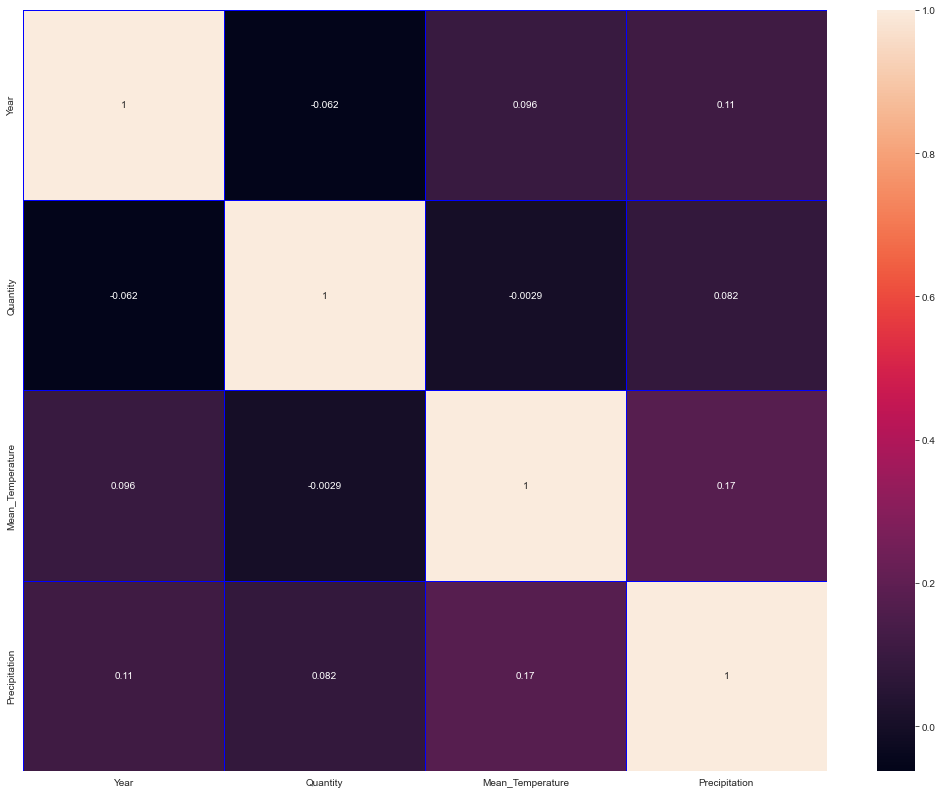

In [398]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire.corr(),annot=True,linecolor="blue",lw=0.5)

In [399]:
encoder = OneHotEncoder(sparse = False) #use OneHotEncoder to translate regions categorical data
region_reshaped = np.array(df_Ire['Region']).reshape(-1, 1)
region_values = encoder.fit_transform(region_reshaped)

In [400]:
encoder.get_feature_names_out()

array(['x0_Border', 'x0_Dublin plus Mid East', 'x0_Mid-West',
       'x0_Midland', 'x0_South-East', 'x0_South-West', 'x0_West'],
      dtype=object)

In [401]:
region_df = pd.DataFrame(region_values, columns=['x0_Border', 'x0_Dublin plus Mid East', 'x0_Mid-West',
       'x0_Midland', 'x0_South-East', 'x0_South-West', 'x0_West'],dtype = 'int8')

In [402]:
glimpse(region_df)

1302 rows and 7 columns


,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
1297,0,0,0,1,0,0,0
1298,0,0,0,1,0,0,0
1299,0,0,0,1,0,0,0
1300,0,0,0,1,0,0,0
1301,0,0,0,1,0,0,0


In [403]:
df_Ire = df_Ire.reset_index()
df_Ire = df_Ire.join(region_df) #join encoded region database with the main database
df_Ire = df_Ire.drop(['index'], axis=1)

In [404]:
df_Ire.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Total cattle,1991,916.5,8.916,1140.468,1,0,0,0,0,0,0
1,Border,Total sheep,1991,1402.8,8.916,1140.468,1,0,0,0,0,0,0
2,Border,Total pigs,1991,304.5,8.916,1140.468,1,0,0,0,0,0,0
3,Border,Total horses and ponies,1991,4.7,8.916,1140.468,1,0,0,0,0,0,0
4,Border,"Total mules, jennets and asses",1991,1.1,8.916,1140.468,1,0,0,0,0,0,0


<AxesSubplot:>

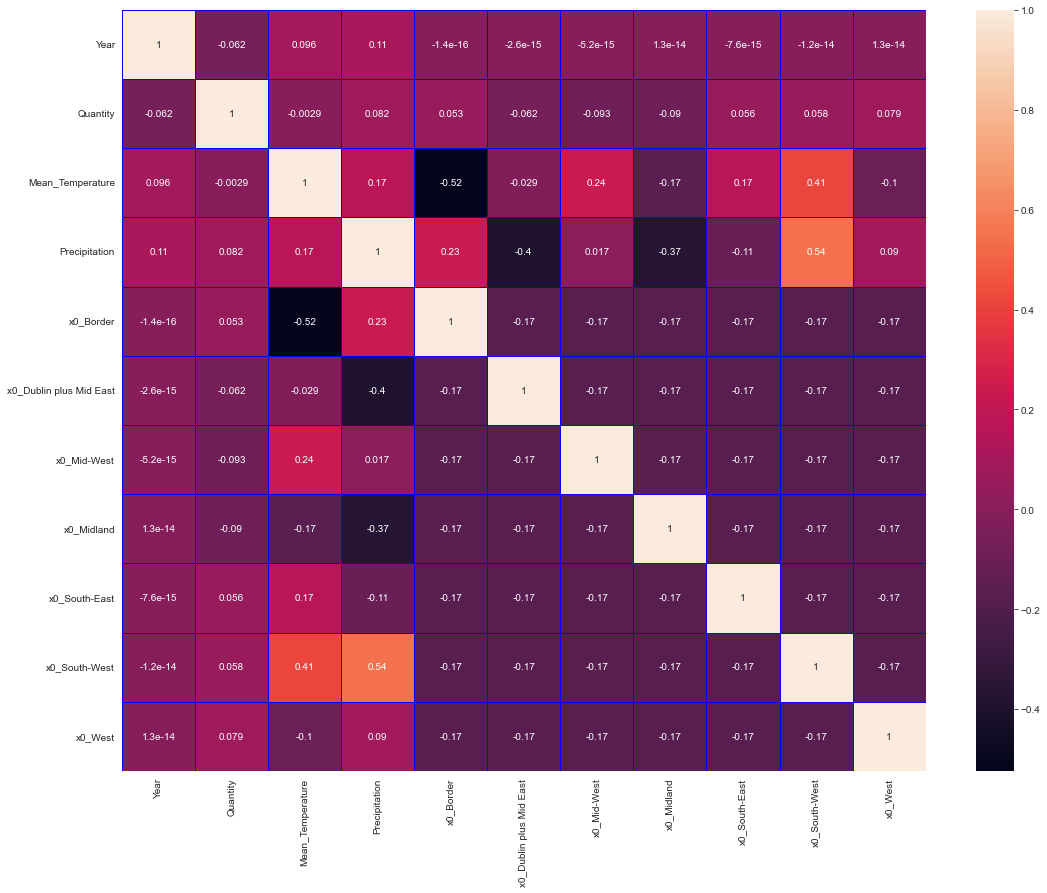

In [405]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire.corr(),annot=True,linecolor="blue",lw=0.5)

In [406]:
df_Ire_cattle = df_Ire[df_Ire['Type of Animal'] == 'Total cattle']

In [407]:
df_Ire_cattle.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Total cattle,1991,916.5,8.916,1140.468,1,0,0,0,0,0,0
6,Border,Total cattle,1992,924.3,8.852,1290.936,1,0,0,0,0,0,0
12,Border,Total cattle,1993,928.4,8.630,1284.264,1,0,0,0,0,0,0
18,Border,Total cattle,1994,934.0,8.844,1309.282,1,0,0,0,0,0,0
24,Border,Total cattle,1995,933.6,9.332,1226.630,1,0,0,0,0,0,0


<AxesSubplot:>

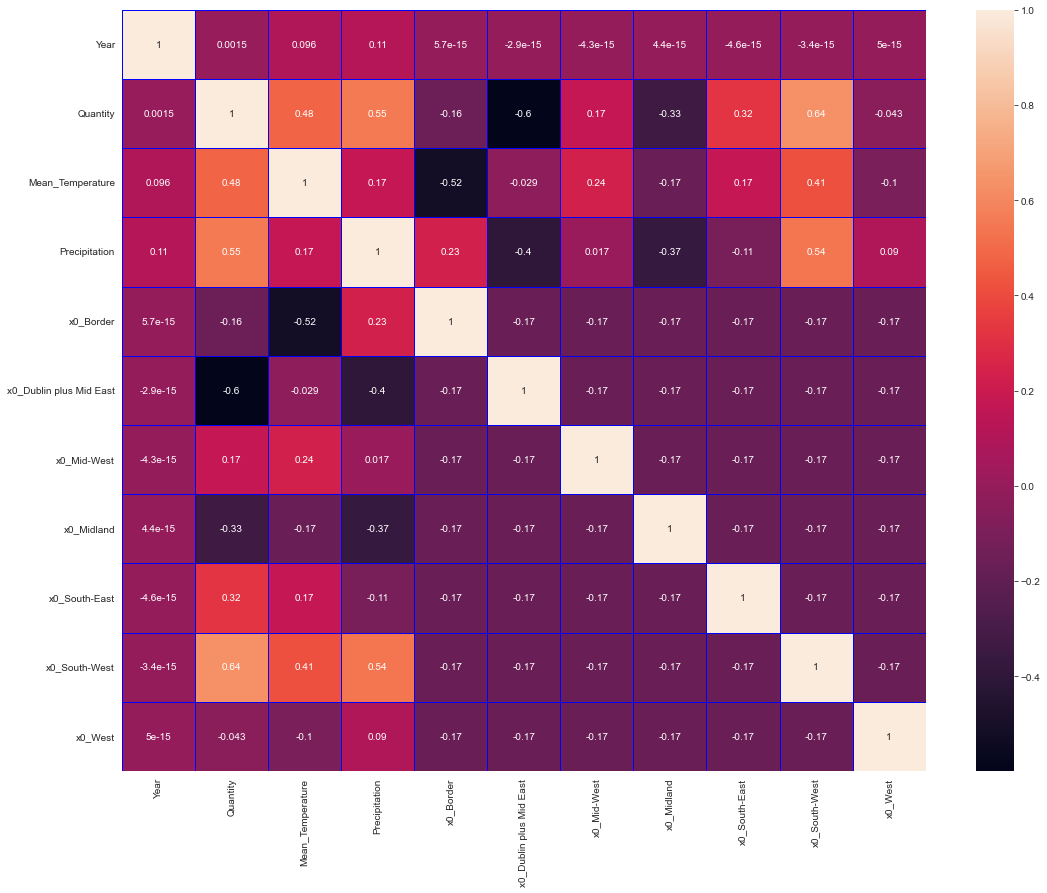

In [408]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire_cattle.corr(),annot=True,linecolor="blue",lw=0.5)

In [409]:
df_Ire_sheep = df_Ire[df_Ire['Type of Animal'] == 'Total sheep']

In [410]:
df_Ire_sheep.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
1,Border,Total sheep,1991,1402.8,8.916,1140.468,1,0,0,0,0,0,0
7,Border,Total sheep,1992,1407.1,8.852,1290.936,1,0,0,0,0,0,0
13,Border,Total sheep,1993,1377.5,8.630,1284.264,1,0,0,0,0,0,0
19,Border,Total sheep,1994,1330.8,8.844,1309.282,1,0,0,0,0,0,0
25,Border,Total sheep,1995,1336.3,9.332,1226.630,1,0,0,0,0,0,0


<AxesSubplot:>

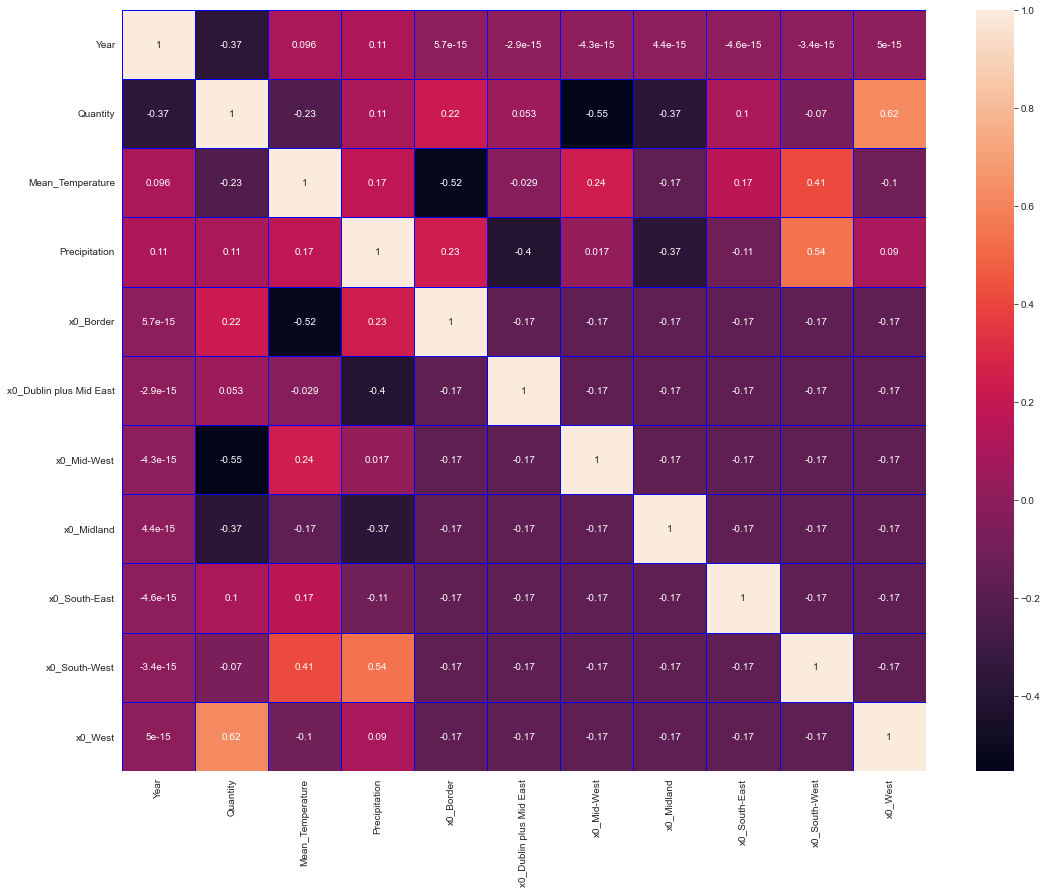

In [411]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire_sheep.corr(),annot=True,linecolor="blue",lw=0.5)

In [412]:
df_Ire_goats = df_Ire[df_Ire['Type of Animal'] == 'Total goats']

In [413]:
df_Ire_goats.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
5,Border,Total goats,1991,3.9,8.916,1140.468,1,0,0,0,0,0,0
11,Border,Total goats,1992,3.9,8.852,1290.936,1,0,0,0,0,0,0
17,Border,Total goats,1993,4.1,8.630,1284.264,1,0,0,0,0,0,0
23,Border,Total goats,1994,3.5,8.844,1309.282,1,0,0,0,0,0,0
29,Border,Total goats,1995,3.2,9.332,1226.630,1,0,0,0,0,0,0


<AxesSubplot:>

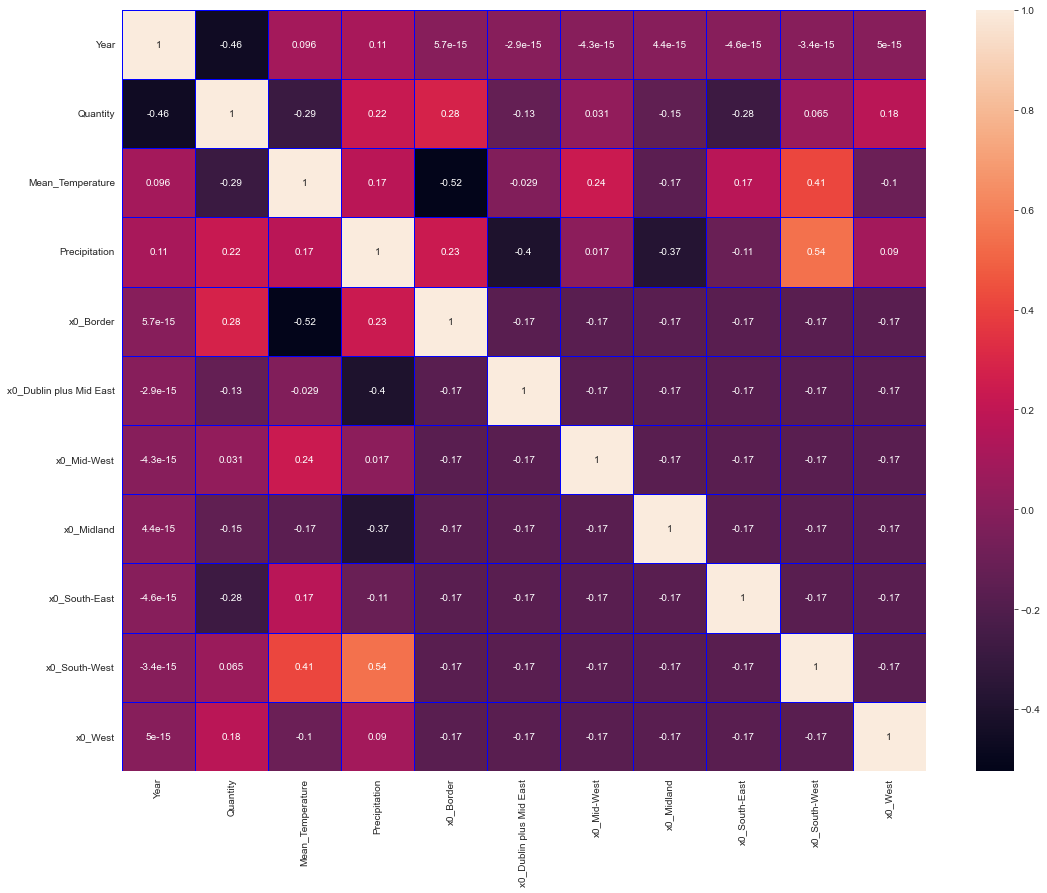

In [414]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire_goats.corr(),annot=True,linecolor="blue",lw=0.5)


In [415]:
df_Ire_horse = df_Ire[df_Ire['Type of Animal'] == 'Total horses and ponies']

In [416]:
df_Ire_horse.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
3,Border,Total horses and ponies,1991,4.7,8.916,1140.468,1,0,0,0,0,0,0
9,Border,Total horses and ponies,1992,5.4,8.852,1290.936,1,0,0,0,0,0,0
15,Border,Total horses and ponies,1993,5.9,8.630,1284.264,1,0,0,0,0,0,0
21,Border,Total horses and ponies,1994,6.0,8.844,1309.282,1,0,0,0,0,0,0
27,Border,Total horses and ponies,1995,6.7,9.332,1226.630,1,0,0,0,0,0,0


<AxesSubplot:>

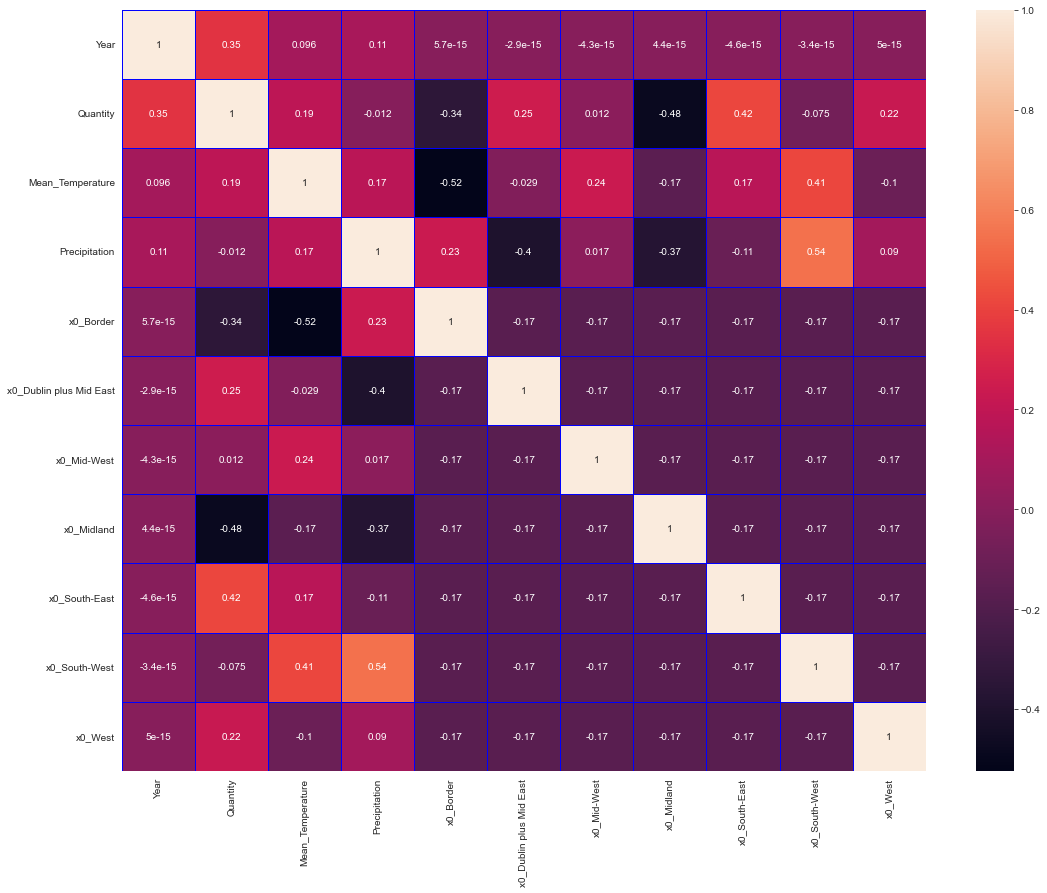

In [417]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire_horse.corr(),annot=True,linecolor="blue",lw=0.5)

In [418]:
df_Ire_mules = df_Ire[df_Ire['Type of Animal'] == 'Total mules, jennets and asses']

In [419]:
df_Ire_mules.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
4,Border,"Total mules, jennets and asses",1991,1.1,8.916,1140.468,1,0,0,0,0,0,0
10,Border,"Total mules, jennets and asses",1992,1.2,8.852,1290.936,1,0,0,0,0,0,0
16,Border,"Total mules, jennets and asses",1993,1.3,8.630,1284.264,1,0,0,0,0,0,0
22,Border,"Total mules, jennets and asses",1994,1.2,8.844,1309.282,1,0,0,0,0,0,0
28,Border,"Total mules, jennets and asses",1995,0.8,9.332,1226.630,1,0,0,0,0,0,0


<AxesSubplot:>

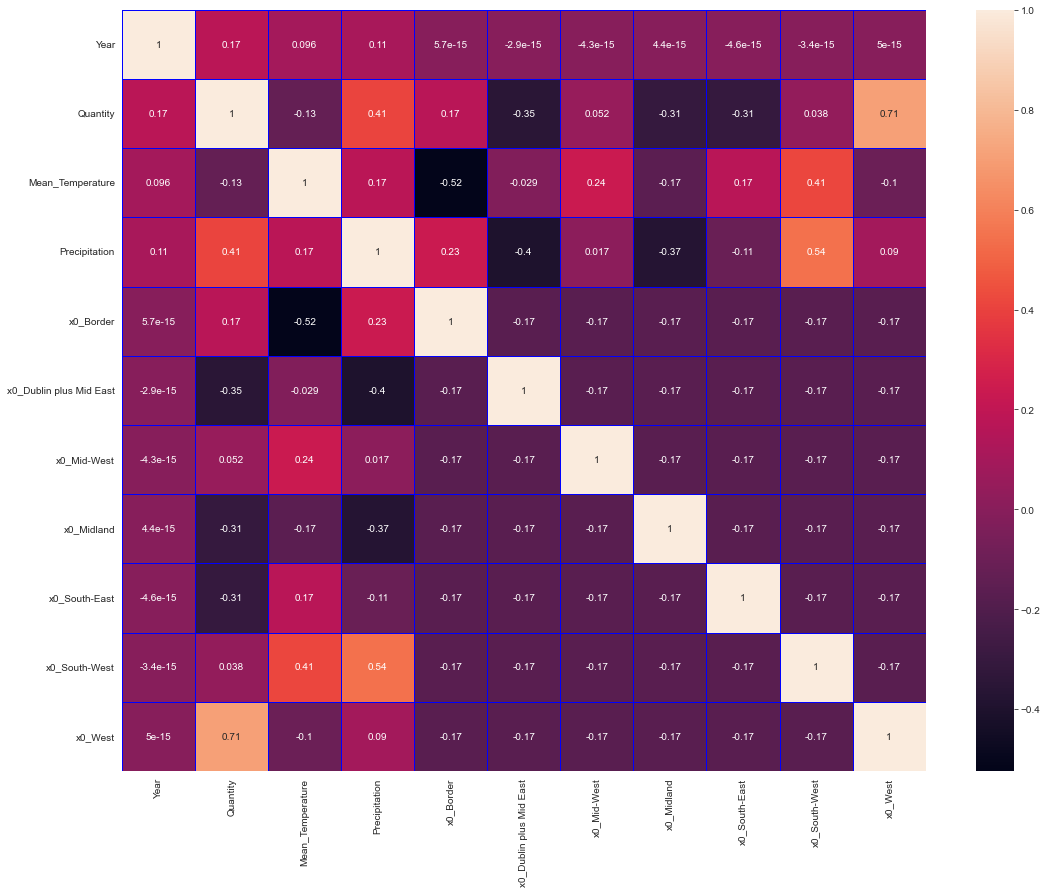

In [420]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire_mules.corr(),annot=True,linecolor="blue",lw=0.5)

In [421]:
df_Ire_cattle

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Total cattle,1991,916.5,8.9160,1140.468000,1,0,0,0,0,0,0
6,Border,Total cattle,1992,924.3,8.8520,1290.936000,1,0,0,0,0,0,0
12,Border,Total cattle,1993,928.4,8.6300,1284.264000,1,0,0,0,0,0,0
18,Border,Total cattle,1994,934.0,8.8440,1309.282000,1,0,0,0,0,0,0
24,Border,Total cattle,1995,933.6,9.3320,1226.630000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,Mid-West,Total cattle,2021,1472.4,10.2100,1121.786667,0,0,1,0,0,0,0
1278,South-East,Total cattle,2021,1059.5,10.1275,1102.015000,0,0,0,0,1,0,0
1284,South-West,Total cattle,2021,1464.9,10.4150,1362.585000,0,0,0,0,0,1,0
1290,Dublin plus Mid East,Total cattle,2021,719.2,9.9260,956.860000,0,1,0,0,0,0,0


In [422]:
df_Ire_cattle = pd.concat([pd.read_csv('cattle 1991-2004.csv'),pd.read_csv('cattle 2005-2014.csv'),pd.read_csv('cattle 2015-2021.csv')])

In [423]:
glimpse(df_Ire_cattle)

1302 rows and 7 columns


,Statistic Label,Region,Type of Animal,Year,UNIT,VALUE,STATISTIC Label
0,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1991,000 Head,137.0,NaN
1,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1992,000 Head,132.4,NaN
2,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1993,000 Head,130.9,NaN
3,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1994,000 Head,129.7,NaN
4,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1995,000 Head,129.5,NaN


,Statistic Label,Region,Type of Animal,Year,UNIT,VALUE,STATISTIC Label
289,NaN,Mid-West,Cattle: under 1 year,2021,000 Head,437.9,Number of Livestock in June
290,NaN,South-East,Cattle: under 1 year,2021,000 Head,304.9,Number of Livestock in June
291,NaN,South-West,Cattle: under 1 year,2021,000 Head,422.4,Number of Livestock in June
292,NaN,Dublin and Mid-East,Cattle: under 1 year,2021,000 Head,191.3,Number of Livestock in June
293,NaN,Midland,Cattle: under 1 year,2021,000 Head,255.2,Number of Livestock in June


In [424]:
df_Ire_cattle = df_Ire_cattle.drop(["Statistic Label", "STATISTIC Label","UNIT"], axis=1) #drop columns

In [425]:
glimpse(df_Ire_cattle)

1302 rows and 4 columns


,Region,Type of Animal,Year,VALUE
0,Border,Dairy cows,1991,137.0
1,Border,Dairy cows,1992,132.4
2,Border,Dairy cows,1993,130.9
3,Border,Dairy cows,1994,129.7
4,Border,Dairy cows,1995,129.5


,Region,Type of Animal,Year,VALUE
289,Mid-West,Cattle: under 1 year,2021,437.9
290,South-East,Cattle: under 1 year,2021,304.9
291,South-West,Cattle: under 1 year,2021,422.4
292,Dublin and Mid-East,Cattle: under 1 year,2021,191.3
293,Midland,Cattle: under 1 year,2021,255.2


In [426]:
df_Ire_cattle.rename(columns = {'VALUE':'Quantity', 'Type of Animal':'Type of Cattle'}, inplace = True)

In [427]:
df_Ire_cattle.head()

,Region,Type of Cattle,Year,Quantity
0,Border,Dairy cows,1991,137.0
1,Border,Dairy cows,1992,132.4
2,Border,Dairy cows,1993,130.9
3,Border,Dairy cows,1994,129.7
4,Border,Dairy cows,1995,129.5


In [428]:
df_Ire_cattle.duplicated().sum()

0

In [429]:
df_Ire_cattle.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West', 'Dublin and Mid-East'], dtype=object)

In [430]:
df_Ire_cattle['Region'] = df_Ire_cattle['Region'].str.replace('Dublin and Mid-East', 'Dublin plus Mid East',regex = True)

In [431]:
df_Ire_cattle['Type of Cattle'].unique()

array(['Dairy cows', 'Other cows', 'Bulls',
       'Other cattle: 2 years and over', 'Other cattle: 1-2 years',
       'Other cattle: under 1 year', 'Cattle: 2 years and over',
       'Cattle: 1-2 years', 'Cattle: under 1 year'], dtype=object)

In [432]:
df_Ire_cattle['Type of Cattle'] = df_Ire_cattle['Type of Cattle'].str.replace('Other ca', 'Ca',regex = True)

In [433]:
df_Ire_cattle['Type of Cattle'].unique()

array(['Dairy cows', 'Other cows', 'Bulls', 'Cattle: 2 years and over',
       'Cattle: 1-2 years', 'Cattle: under 1 year'], dtype=object)

In [434]:
df_Ire_cattle.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [435]:
df_Ire_cattle.Year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [436]:
df_Ire_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 293
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1302 non-null   object 
 1   Type of Cattle  1302 non-null   object 
 2   Year            1302 non-null   int64  
 3   Quantity        1302 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 50.9+ KB


In [437]:
df_Ire_cattle.isnull().sum()

Region            0
Type of Cattle    0
Year              0
Quantity          0
dtype: int64

In [438]:
df_Ire_cattle.shape

(1302, 4)

In [439]:
df_Ire_cattle.Quantity.describe()

count    1302.000000
mean      164.647312
std       108.744584
min         1.700000
25%        91.650000
50%       151.500000
75%       243.000000
max       500.500000
Name: Quantity, dtype: float64

In [440]:
df_Ire_cattle.count()

Region            1302
Type of Cattle    1302
Year              1302
Quantity          1302
dtype: int64

In [441]:
df_Ire_cattle.Quantity.skew(axis = 0)

0.37221210278466577

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



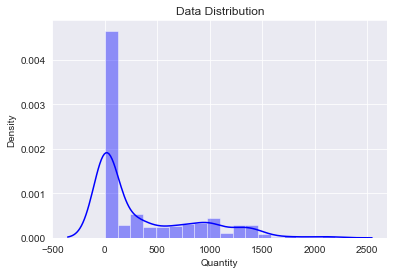

In [442]:
sns.distplot(df_Ire.Quantity, hist=True, color="b", label="Fitted Values")


plt.title('Data Distribution')

plt.show()
plt.close()
sns.set_style("darkgrid")

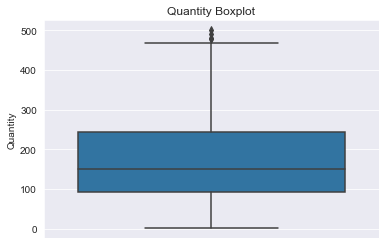

In [443]:
sns.boxplot(y=df_Ire_cattle.Quantity); #boxplot graph showing the quantity of outliers present in our data
plt.title('Quantity Boxplot')
sns.set_style("darkgrid")

In [444]:
yearly_Cattle = df_Ire_cattle.groupby(['Year'],sort = False)['Quantity'].sum().reset_index()
print(yearly_Cattle)

    Year  Quantity
0   1991    6732.1
1   1992    6682.3
2   1993    6682.6
3   1994    6690.8
4   1995    6692.8
5   1996    6953.5
6   1997    7145.1
7   1998    7284.5
8   1999    7056.9
9   2000    6705.5
10  2001    6718.7
11  2002    6618.2
12  2003    6646.8
13  2004    6646.5
14  2005    6991.7
15  2006    6977.9
16  2007    6890.6
17  2008    6902.3
18  2009    6890.4
19  2010    6606.7
20  2011    6493.0
21  2012    6754.3
22  2013    6902.8
23  2014    6926.0
24  2015    6963.4
25  2016    7221.3
26  2017    7363.3
27  2018    7348.5
28  2019    7208.6
29  2020    7314.8
30  2021    7358.9


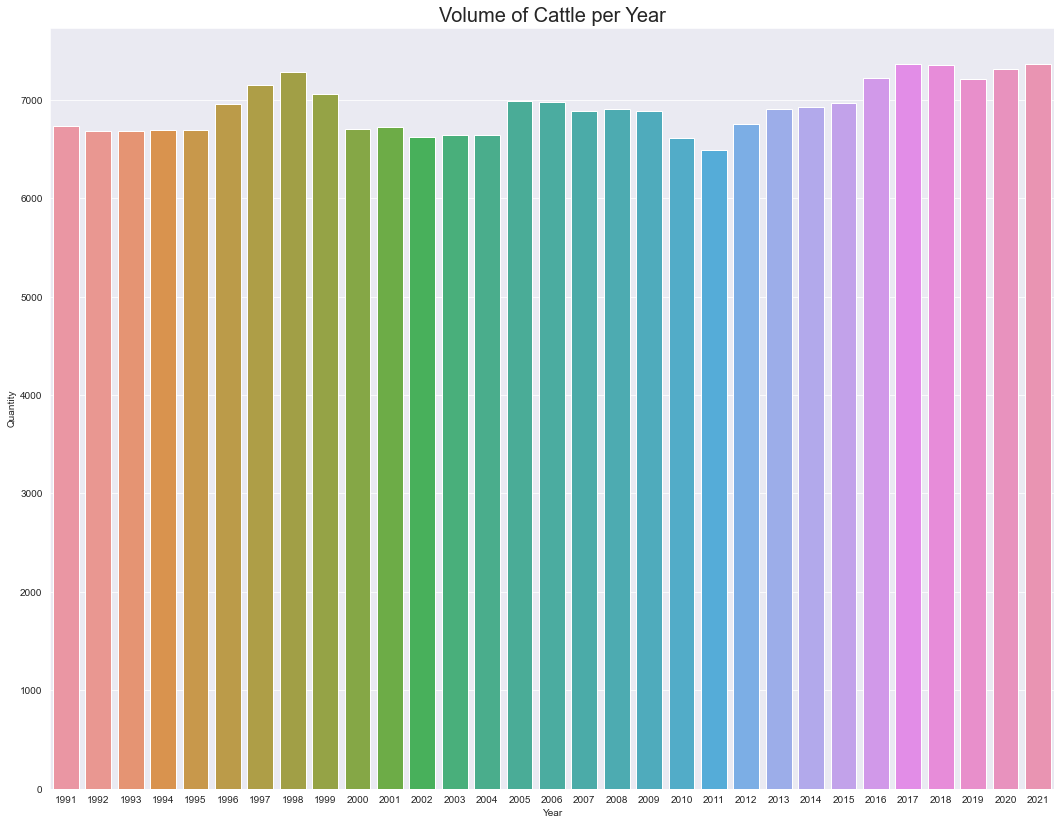

In [445]:
plt.figure(figsize=(18,14))
ax = sns.barplot(x = 'Year', y = 'Quantity', ci = None, data = df_Ire_cattle, estimator=sum)
plt.title('Volume of Cattle per Year', fontsize=20)

sns.set_style("darkgrid")

In [446]:
yearly_Cattle.describe()

,Year,Quantity
count,31.000000,31.000000
mean,2006.000000,6915.187097
std,9.092121,258.550741
min,1991.000000,6493.000000
25%,1998.500000,6691.800000
50%,2006.000000,6902.300000
75%,2013.500000,7101.000000
max,2021.000000,7363.300000


In [447]:
df_Ire_weather.Region.unique()

array(['South-East', 'Border', 'Mid-West', 'South-West',
       'Dublin plus Mid East', 'West', 'Midland'], dtype=object)

In [448]:
df_Ire_cattle.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [449]:
df_Ire_cattle = pd.merge(df_Ire_cattle, df_Ire_weather, how="inner", on=["Region","Year"])

In [450]:
glimpse(df_Ire_cattle)

1302 rows and 6 columns


,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation
0,Border,Dairy cows,1991,137.0,8.916,1140.468
1,Border,Other cows,1991,164.5,8.916,1140.468
2,Border,Bulls,1991,2.9,8.916,1140.468
3,Border,Cattle: 2 years and over,1991,128.8,8.916,1140.468
4,Border,Cattle: 1-2 years,1991,215.7,8.916,1140.468


,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation
1297,Midland,Other cows,2021,117.8,9.745,955.885
1298,Midland,Bulls,2021,5.6,9.745,955.885
1299,Midland,Cattle: 2 years and over,2021,104.6,9.745,955.885
1300,Midland,Cattle: 1-2 years,2021,257.6,9.745,955.885
1301,Midland,Cattle: under 1 year,2021,255.2,9.745,955.885


<AxesSubplot:>

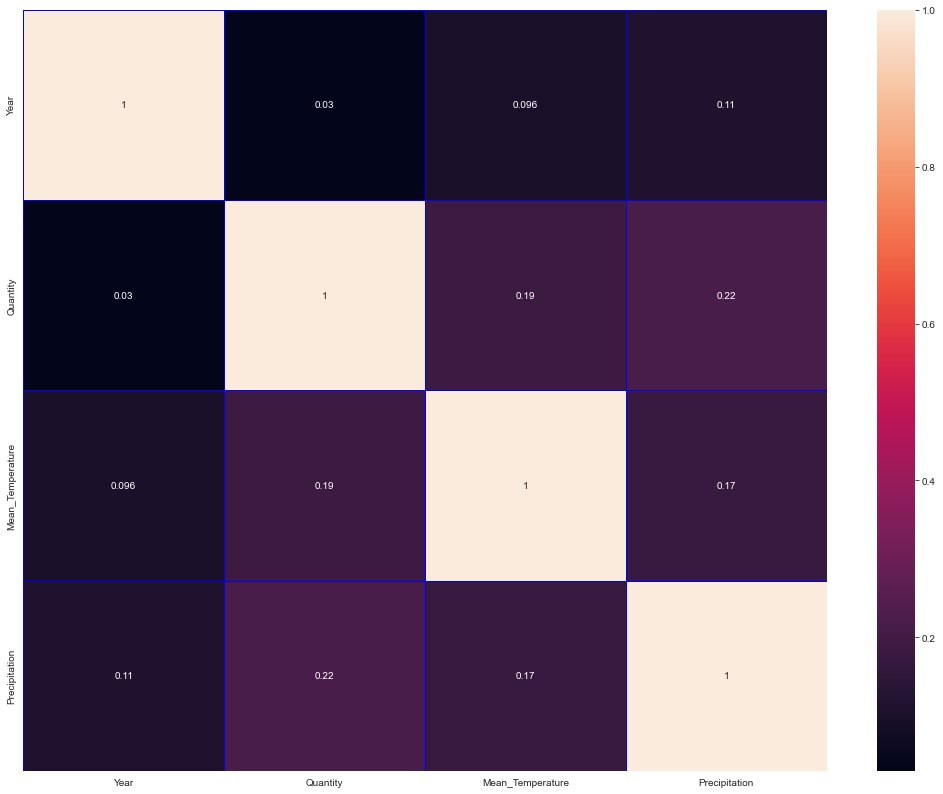

In [451]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire_cattle.corr(),annot=True,linecolor="blue",lw=0.5)

In [452]:
encoder = OneHotEncoder(sparse = False) #use OneHotEncoder to translate regions categorical data
region_reshaped = np.array(df_Ire_cattle['Region']).reshape(-1, 1)
region_values = encoder.fit_transform(region_reshaped)

In [453]:
encoder.get_feature_names_out()

array(['x0_Border', 'x0_Dublin plus Mid East', 'x0_Mid-West',
       'x0_Midland', 'x0_South-East', 'x0_South-West', 'x0_West'],
      dtype=object)

In [454]:
region_df = pd.DataFrame(region_values, columns=['x0_Border', 'x0_Dublin plus Mid East', 'x0_Mid-West',
       'x0_Midland', 'x0_South-East', 'x0_South-West', 'x0_West'],dtype = 'int8')

In [455]:
glimpse(region_df)

1302 rows and 7 columns


,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
1297,0,0,0,1,0,0,0
1298,0,0,0,1,0,0,0
1299,0,0,0,1,0,0,0
1300,0,0,0,1,0,0,0
1301,0,0,0,1,0,0,0


In [456]:
df_Ire_cattle = df_Ire_cattle.reset_index()
df_Ire_cattle = df_Ire_cattle.join(region_df) #join encoded region database with the main database
df_Ire_cattle = df_Ire_cattle.drop(['index'], axis=1)

In [457]:
df_Ire_cattle.head()

,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Dairy cows,1991,137.0,8.916,1140.468,1,0,0,0,0,0,0
1,Border,Other cows,1991,164.5,8.916,1140.468,1,0,0,0,0,0,0
2,Border,Bulls,1991,2.9,8.916,1140.468,1,0,0,0,0,0,0
3,Border,Cattle: 2 years and over,1991,128.8,8.916,1140.468,1,0,0,0,0,0,0
4,Border,Cattle: 1-2 years,1991,215.7,8.916,1140.468,1,0,0,0,0,0,0


<AxesSubplot:>

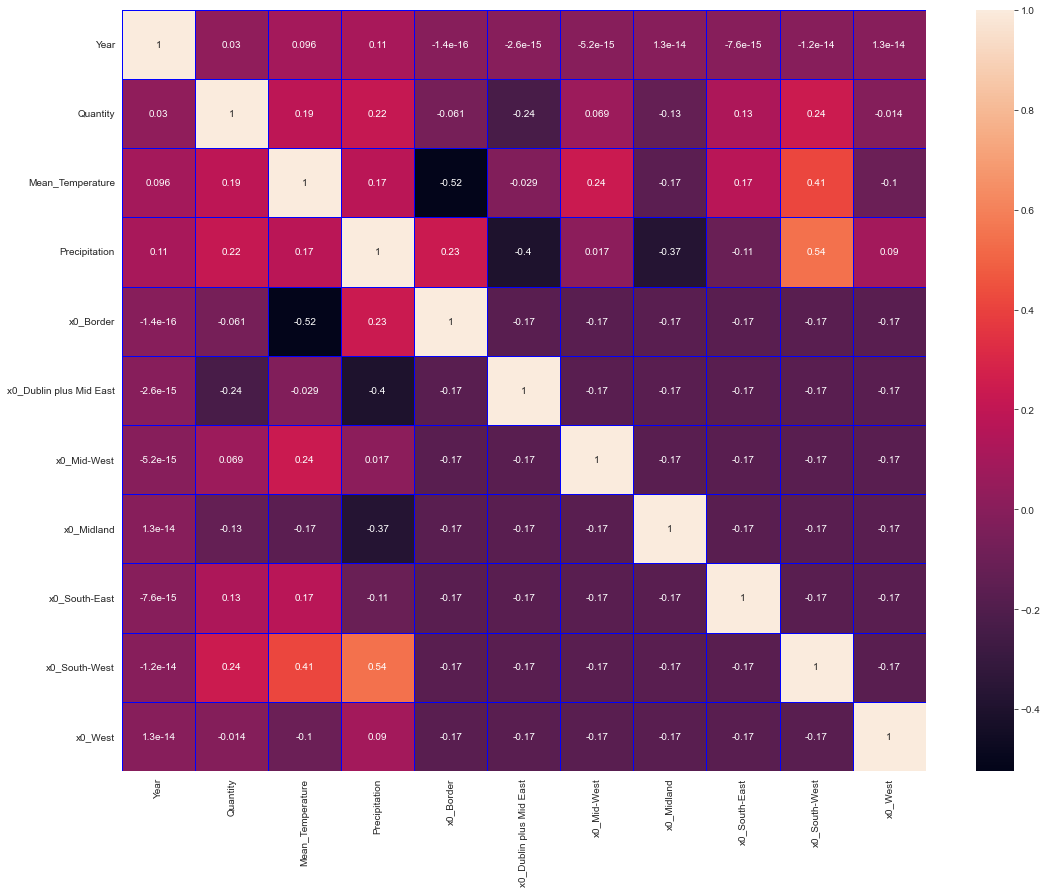

In [458]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire_cattle.corr(),annot=True,linecolor="blue",lw=0.5)

In [459]:
encoder = OneHotEncoder(sparse = False) #use OneHotEncoder to translate type of animals into categorical data
animal_reshaped = np.array(df_Ire_cattle['Type of Cattle']).reshape(-1, 1)
animal_values = encoder.fit_transform(animal_reshaped)

In [460]:
encoder.get_feature_names_out()

array(['x0_Bulls', 'x0_Cattle: 1-2 years', 'x0_Cattle: 2 years and over',
       'x0_Cattle: under 1 year', 'x0_Dairy cows', 'x0_Other cows'],
      dtype=object)

In [461]:
animal_df = pd.DataFrame(animal_values, columns=['x0_Bulls', 'x0_Cattle: 1-2 years', 'x0_Cattle: 2 years and over',
       'x0_Cattle: under 1 year', 'x0_Dairy cows', 'x0_Other cows'],dtype = 'int8')

In [462]:
glimpse(animal_df)

1302 rows and 6 columns


,x0_Bulls,x0_Cattle: 1-2 years,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


,x0_Bulls,x0_Cattle: 1-2 years,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows
1297,0,0,0,0,0,1
1298,1,0,0,0,0,0
1299,0,0,1,0,0,0
1300,0,1,0,0,0,0
1301,0,0,0,1,0,0


In [463]:
df_Ire_cattle = df_Ire_cattle.reset_index()
df_Ire_cattle = df_Ire_cattle.join(animal_df) #join encoded region database with the main database
df_Ire_cattle = df_Ire_cattle.drop(['index'], axis=1)

In [464]:
df_Ire_cattle.head()

,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West,x0_Bulls,x0_Cattle: 1-2 years,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows
0,Border,Dairy cows,1991,137.0,8.916,1140.468,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Border,Other cows,1991,164.5,8.916,1140.468,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Border,Bulls,1991,2.9,8.916,1140.468,1,0,0,0,0,0,0,1,0,0,0,0,0
3,Border,Cattle: 2 years and over,1991,128.8,8.916,1140.468,1,0,0,0,0,0,0,0,0,1,0,0,0
4,Border,Cattle: 1-2 years,1991,215.7,8.916,1140.468,1,0,0,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

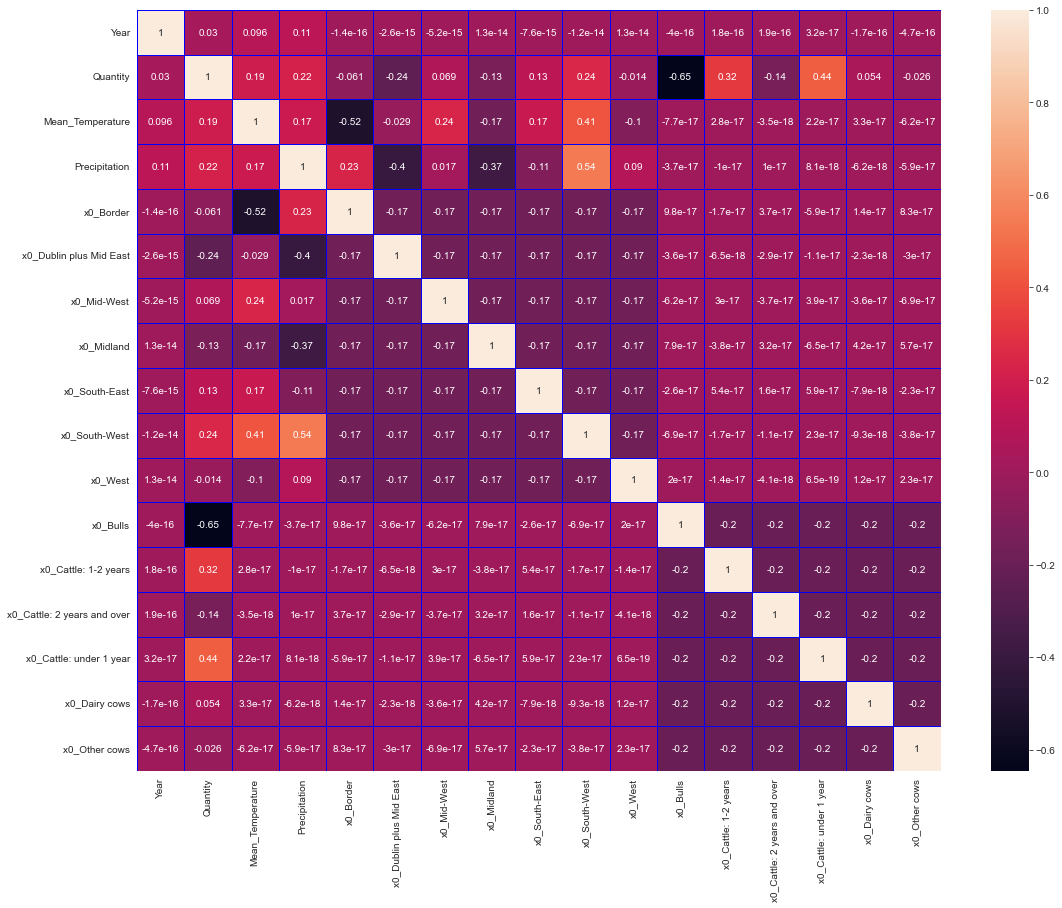

In [465]:
plt.figure(figsize=(18,14))
sns.heatmap(df_Ire_cattle.corr(),annot=True,linecolor="blue",lw=0.5)

In [466]:
df_Cattle_percentage = pd.DataFrame(df_Ire_cattle.groupby(['Type of Cattle','Year'],sort = False)['Quantity'].sum()).reset_index()

In [467]:
df_Cattle_percentage = pd.merge(df_Cattle_percentage, yearly_Cattle, how="right", on=["Year"])

In [468]:
glimpse(df_Cattle_percentage)

186 rows and 4 columns


,Type of Cattle,Year,Quantity_x,Quantity_y
0,Dairy cows,1991,1330.9,6732.1
1,Other cows,1991,817.3,6732.1
2,Bulls,1991,28.6,6732.1
3,Cattle: 2 years and over,1991,1098.7,6732.1
4,Cattle: 1-2 years,1991,1692.0,6732.1


,Type of Cattle,Year,Quantity_x,Quantity_y
181,Other cows,2021,940.3,7358.9
182,Bulls,2021,50.5,7358.9
183,Cattle: 2 years and over,2021,718.1,7358.9
184,Cattle: 1-2 years,2021,1899.7,7358.9
185,Cattle: under 1 year,2021,2145.8,7358.9


In [469]:
df_Cattle_percentage["Percentage"] = df_Cattle_percentage["Quantity_x"]/df_Cattle_percentage["Quantity_y"]*100

In [470]:
glimpse(df_Cattle_percentage)

186 rows and 5 columns


,Type of Cattle,Year,Quantity_x,Quantity_y,Percentage
0,Dairy cows,1991,1330.9,6732.1,19.769463
1,Other cows,1991,817.3,6732.1,12.140343
2,Bulls,1991,28.6,6732.1,0.424830
3,Cattle: 2 years and over,1991,1098.7,6732.1,16.320316
4,Cattle: 1-2 years,1991,1692.0,6732.1,25.133316


,Type of Cattle,Year,Quantity_x,Quantity_y,Percentage
181,Other cows,2021,940.3,7358.9,12.777725
182,Bulls,2021,50.5,7358.9,0.686244
183,Cattle: 2 years and over,2021,718.1,7358.9,9.758252
184,Cattle: 1-2 years,2021,1899.7,7358.9,25.815000
185,Cattle: under 1 year,2021,2145.8,7358.9,29.159249


In [471]:
df_Cattle_percentage.head(6)

,Type of Cattle,Year,Quantity_x,Quantity_y,Percentage
0,Dairy cows,1991,1330.9,6732.1,19.769463
1,Other cows,1991,817.3,6732.1,12.140343
2,Bulls,1991,28.6,6732.1,0.424830
3,Cattle: 2 years and over,1991,1098.7,6732.1,16.320316
4,Cattle: 1-2 years,1991,1692.0,6732.1,25.133316
5,Cattle: under 1 year,1991,1764.6,6732.1,26.211732


In [472]:
df_Cattle_percentage = df_Cattle_percentage.drop(['Quantity_y'],axis=1)

In [473]:
df_Cattle_percentage.rename(columns = {'Quantity_x':'Quantity'}, inplace = True)

In [474]:
glimpse(df_Cattle_percentage)

186 rows and 4 columns


,Type of Cattle,Year,Quantity,Percentage
0,Dairy cows,1991,1330.9,19.769463
1,Other cows,1991,817.3,12.140343
2,Bulls,1991,28.6,0.424830
3,Cattle: 2 years and over,1991,1098.7,16.320316
4,Cattle: 1-2 years,1991,1692.0,25.133316


,Type of Cattle,Year,Quantity,Percentage
181,Other cows,2021,940.3,12.777725
182,Bulls,2021,50.5,0.686244
183,Cattle: 2 years and over,2021,718.1,9.758252
184,Cattle: 1-2 years,2021,1899.7,25.815000
185,Cattle: under 1 year,2021,2145.8,29.159249


In [475]:
mean_cattle_percentage = df_Cattle_percentage.groupby(['Type of Cattle'],sort = False)['Percentage'].mean().reset_index()
mean_cattle_percentage

,Type of Cattle,Percentage
0,Dairy cows,17.980545
1,Other cows,16.040200
2,Bulls,0.767537
3,Cattle: 2 years and over,13.188960
4,Cattle: 1-2 years,24.520126
5,Cattle: under 1 year,27.502633


In [476]:
#The probability of having less or equal to 1% proportion of Total Cattle as "Bulls" for 2022 when λ is equal to 0.767537%
#Calculate probability P(X < 1) when X ~ N(mu = .767537)

norm.cdf(1, loc = .767537)

0.5919107890815516

In [477]:
# Calculate probability P(X > 20) when X ~ N(mu = 17.980545)
# Having that λ for the thirty years for "Dairy Cows" is 17.980545% the probability of the proportion of cattle being 
# "Dairy Cows" more than 20 
1-norm.cdf(20, loc=17.980545)

0.021719974980076273

State the null ($H_0$) and alternative ($H_A$) hypotheses, it's suspected that the mean of 'Cattles under 1 year' is 285 through the 30 years

$H_0: \mu = 285$ vs. $H_A: \mu \neq 285$ taking $\alpha = 0.05$. 

In [478]:
df1 = df_Ire_cattle[(df_Ire_cattle['Type of Cattle']=='Cattle: under 1 year')]
stats.ttest_1samp(df1.Quantity, popmean=285)

Ttest_1sampResult(statistic=-2.395061413088565, pvalue=0.017471204741172763)

<AxesSubplot:title={'center':'Cattle under 1 year quantity histogram'}>

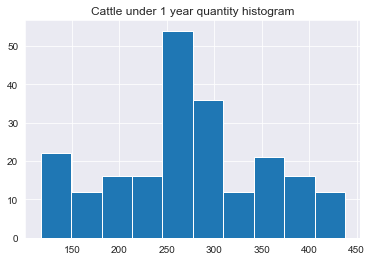

In [479]:
plt.figure()
plt.title('Cattle under 1 year quantity histogram')
df1.Quantity.hist()

Since the p-value < $\alpha$, we reject $H_0$.

Given our observed data (and with a significance level of $\alpha=0.05$), we have enough evidence that the population mean $\mu$ is different from 285.

State the null ($H_0$) and alternative ($H_A$) hypotheses, it's suspected that the mean of 'Cattles of 2 years and over' is greater than 130 through the 30 years

$H_0: \mu = 130$ vs. $H_A: \mu \nless 130$ taking $\alpha = 0.05$. 

In [480]:
df1 = df_Ire_cattle[(df_Ire_cattle['Type of Cattle']=='Cattle: 2 years and over')]
stats.ttest_1samp(df1.Quantity, popmean=130,alternative = 'greater')

Ttest_1sampResult(statistic=-0.09044456838249591, pvalue=0.5359911223398056)

<AxesSubplot:title={'center':'Cattle over 2 years quantity histogram'}>

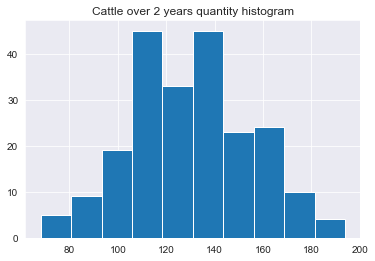

In [481]:
plt.figure()
plt.title('Cattle over 2 years quantity histogram')
df1.Quantity.hist()

Since the p-value $\nless$ $\alpha$, we fail to reject $H_0$.

Given our observed data (and with a significance level of $\alpha=0.05$), we do not have enough evidence to support that the population mean $\mu$ is not greater than 130.

It is suspected that the 6 Types of Cattle in Ireland are in quantity equally Distributed

In [482]:
# Subsetting:
df1 = df_Ire_cattle[(df_Ire_cattle['Type of Cattle']=='Dairy cows')]
df2 = df_Ire_cattle[(df_Ire_cattle['Type of Cattle']=='Other cows')]
df3 = df_Ire_cattle[(df_Ire_cattle['Type of Cattle']=='Bulls')]
df4 = df_Ire_cattle[(df_Ire_cattle['Type of Cattle']=='Cattle: 2 years and over')]
df5 = df_Ire_cattle[(df_Ire_cattle['Type of Cattle']=='Cattle: 1-2 years')]
df6 = df_Ire_cattle[(df_Ire_cattle['Type of Cattle']=='Cattle: under 1 year')]

# Let's perform the test:
# Import the library
import scipy.stats as stats

# Perform the Kruskal test:
stats.kruskal(df1['Quantity'], df2['Quantity'], df3['Quantity'], df4['Quantity'], df5['Quantity'], df6['Quantity'])

KruskalResult(statistic=834.8771424575154, pvalue=3.292640207658986e-178)

We reject the hypothesis as p value is 0, 

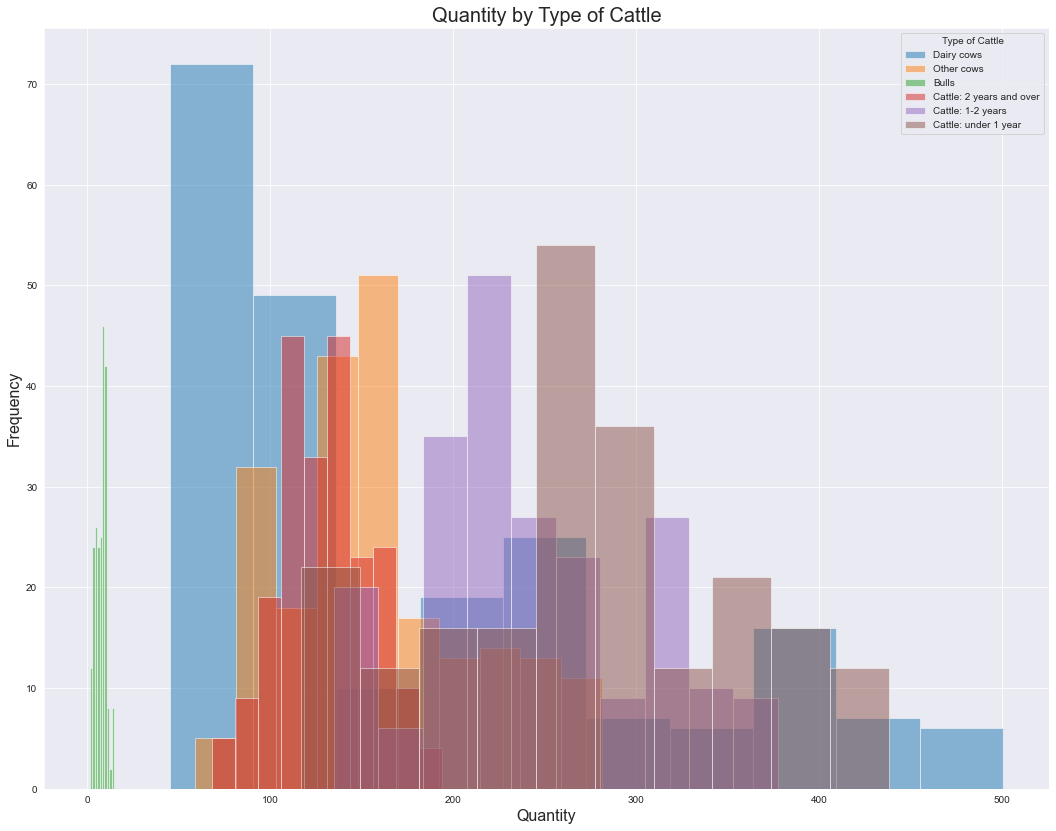

In [483]:
# Add three histograms to one plot
plt.figure(figsize=(18,14))
plt.hist(df1['Quantity'], alpha=0.5, label='Dairy cows')
plt.hist(df2['Quantity'], alpha=0.5, label='Other cows')
plt.hist(df3['Quantity'], alpha=0.5, label='Bulls')
plt.hist(df4['Quantity'], alpha=0.5, label='Cattle: 2 years and over')
plt.hist(df5['Quantity'], alpha=0.5, label='Cattle: 1-2 years')
plt.hist(df6['Quantity'], alpha=0.5, label='Cattle: under 1 year')



# Add plot title and axis labels
plt.title('Quantity by Type of Cattle', fontsize=20)
plt.xlabel('Quantity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)


# Add legend
plt.legend(title='Type of Cattle')

# Display plot
plt.show()

In [484]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_Ire_cattle['Quantity'],
                          groups=df_Ire_cattle['Type of Cattle'],
                          alpha=0.05)

#display results
print(tukey)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
         group1                   group2           meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------------------
                   Bulls        Cattle: 1-2 years    234.87    0.0  216.3655 253.3746   True
                   Bulls Cattle: 2 years and over  122.2668    0.0  103.7623 140.7713   True
                   Bulls     Cattle: under 1 year  264.3304    0.0  245.8259 282.8349   True
                   Bulls               Dairy cows  170.3046    0.0  151.8001 188.8091   True
                   Bulls               Other cows  150.6309    0.0  132.1264 169.1354   True
       Cattle: 1-2 years Cattle: 2 years and over -112.6032    0.0 -131.1077 -94.0987   True
       Cattle: 1-2 years     Cattle: under 1 year   29.4604 0.0001   10.9559  47.9649   True
       Cattle: 1-2 years               Dairy cows  -64.5654    0.0    

This table help us to check how there's no equal distribution between any of the different categories

In [485]:
#Function to calculate the SMAPE
def smape(act,forc):
    return 100/len(act) * np.sum(2 * np.abs(forc - act) / (np.abs(act) + np.abs(forc)))

In [486]:
# prepare database variables for Regression
y = df_Ire_cattle['Quantity']
X = df_Ire_cattle.drop(['Quantity','Region','Type of Cattle'],axis=1)

In [487]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 10)

In [488]:
param_grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_depth': np.arange(3, 50), 
              'max_features': np.arange(1, 10),'random_state' : [10]}
# Create Decision Tree Regressor object
DTregressor = RandomizedSearchCV(DecisionTreeRegressor(),param_grid,
                                n_jobs = -2,cv = TimeSeriesSplit(n_splits = 20),random_state=10,n_iter = 5)

# Train Decision Tree Regressor
DTregressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
                   estimator=DecisionTreeRegressor(), n_iter=5, n_jobs=-2,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': [10]},
                   random_state=10)

In [489]:
y_pred_DTR = DTregressor.predict(X_test)

In [490]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DTR)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_DTR)))

R-squared of the model in training set is: 0.997030137416256
-----Test set statistics-----
R-squared of the model in test set is: 0.9417805218752514
Normalized Root mean squared error of the prediction is: 0.05068784148172982
Symmetric mean absolute percentage error of the prediction is: 10.52750280946965


In [491]:
cross_val_score(DTregressor, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

0.7231873687676311

In [492]:
DTregressor.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=14, max_features=6,
                      random_state=10)

In [493]:
scores = DTregressor.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_max_features,param_max_depth,param_criterion,params,split0_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004947,0.000742,0.003056,0.000589,10,3,5,poisson,"{'random_state': 10, 'max_features': 3, 'max_d...",0.250592,...,0.678562,0.536808,0.555635,0.527002,0.547675,0.648554,0.435881,0.433829,0.184672,5
1,0.035698,0.021831,0.003751,0.000828,10,7,36,absolute_error,"{'random_state': 10, 'max_features': 7, 'max_d...",-0.346320,...,0.916211,0.871236,0.944968,0.963535,0.807784,0.955908,0.814309,0.718934,0.326472,2
2,0.008649,0.001235,0.004201,0.000750,10,6,14,friedman_mse,"{'random_state': 10, 'max_features': 6, 'max_d...",0.060304,...,0.796527,0.892393,0.955002,0.931181,0.896565,0.976115,0.963014,0.744379,0.273437,1
3,0.007400,0.002557,0.004101,0.000626,10,4,11,poisson,"{'random_state': 10, 'max_features': 4, 'max_d...",0.160408,...,0.538364,0.418018,0.444073,0.700476,0.540901,0.731942,0.763365,0.528738,0.284296,4
4,0.009398,0.002154,0.003852,0.000792,10,8,16,poisson,"{'random_state': 10, 'max_features': 8, 'max_d...",0.110100,...,0.715275,0.775128,0.812725,0.682527,0.611328,0.678738,0.921283,0.596583,0.189140,3


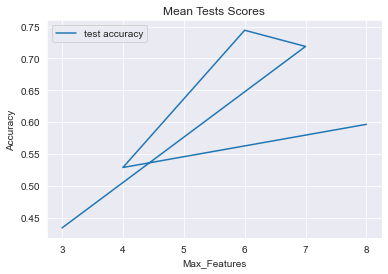

In [494]:
# plotting accuracies with optimizer
plt.figure()
plt.title('Mean Tests Scores')
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Max_Features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [495]:
px.scatter(
     x=Y_test, y=y_pred_DTR, opacity=0.65,
    trendline='ols', trendline_color_override='darkorange',
    labels = dict(x = "Actual",y = "Prediction Decision Tree"), color_discrete_sequence=['orange'],
   title = "Actual vs Prediction Decision Tree"
).show()

In [496]:
param_grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_depth': np.arange(3, 50),
              'random_state' : [10],'n_estimators': np.arange(80, 100),'max_features': np.arange(5, 10) }
# Create Random Forest Regressor object
RFregressor = RandomizedSearchCV(RandomForestRegressor(),param_grid,n_jobs = -2, cv = TimeSeriesSplit(n_splits = 20),
                                 random_state=10,n_iter = 5)
RFregressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
                   estimator=RandomForestRegressor(), n_iter=5, n_jobs=-2,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': array([5, 6, 7, 8, 9]),
                                        'n_estimators': array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99]),
                                        'random_state'

In [497]:
y_pred_random = RFregressor.predict(X_test)

In [498]:
print("R-squared of the model in training set is: {}".format(RFregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(RFregressor.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_random)))

R-squared of the model in training set is: 0.9970056784921664
-----Test set statistics-----
R-squared of the model in test set is: 0.9765223242793618
Normalized Root mean squared error of the prediction is: 0.032188237210654905
Symmetric mean absolute percentage error of the prediction is: 7.344590676489316


In [499]:
cross_val_score(RFregressor, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

KeyboardInterrupt: 

In [ ]:
RFregressor.best_estimator_

In [ ]:
scores = RFregressor.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with optimizer
plt.figure()
plt.title('Mean Tests Scores')
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Max_Features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
px.scatter(
     x=Y_test, y=y_pred_random, opacity=0.65,
    trendline='ols', trendline_color_override='darkred',
    labels = dict(x = "Actual",y = "Prediction Random Forest"), color_discrete_sequence=['red'],
    title = "Actual vs Prediction Random Forest"
).show()

In [ ]:
class MLPRegressor(KerasRegressor):
    # Initialize the MLP model with several hyperparameters
    def __init__(
        self,
        hidden_layer_sizes=(100, ),  # tuple of integers specifying number of units in each hidden layer
        optimizer="adam",  # name of the optimizer to use
        optimizer__learning_rate=1,  # learning rate for the optimizer
        epochs=200,  # number of epochs to train the model for
        verbose=0,  # verbosity of the training process (0 = silent, 1 = progress bar, 2 = one line per epoch)
        validation_data='none',
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.hidden_layer_sizes = hidden_layer_sizes
        self.optimizer = optimizer
        self.epochs = epochs
        self.verbose = verbose

    # Build the actual Keras model
    def _keras_build_fn(self, compile_kwargs: Dict[str, Any]):
        model = keras.Sequential()  # create a Sequential model
        inp = keras.layers.Input(shape=(self.n_features_in_))  # create an input layer
        model.add(inp)  # add the input layer to the model
        # loop through the specified number of units in each hidden layer
        for hidden_layer_size in self.hidden_layer_sizes:
            # create a dense (fully-connected) hidden layer with the specified number of units and ReLU activation
            layer = keras.layers.Dense(hidden_layer_size, activation="relu")
            model.add(layer)  # add the hidden layer to the model
        # create an output layer with a single unit
        out = keras.layers.Dense(1)
        model.add(out)  # add the output layer to the model
        # compile the model with a mean squared error loss function and the specified optimizer
        model.compile(loss="mse", optimizer=compile_kwargs["optimizer"])
        return model  # return the compiled model

In [ ]:
param_grid = {'optimizer':['adadelta', 'adamax', 'rmsprop','adam'],
              'random_state' : [10], 'epochs' : np.arange(5000, 10000) }
# Create ANN Regressor object
ANNregressor1 = RandomizedSearchCV(MLPRegressor(validation_data=(X_test, Y_test),random_state=10),
                            param_grid,n_jobs = -2, cv = TimeSeriesSplit(n_splits = 20),random_state=10,n_iter = 4)

In [ ]:
ANNregressor1.fit(X_train, Y_train)

In [ ]:
ANNregressor1.get_params().keys()

In [ ]:
y_pred_ANN1 = ANNregressor1.predict(X_test)

In [ ]:
print("R-squared of the model in training set is: {}".format(ANNregressor1.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ANNregressor1.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_ANN1)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_ANN1)))

In [ ]:
cross_val_score(ANNregressor1, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

In [ ]:
ANNregressor1.best_estimator_

In [ ]:
class MLPRegressor(KerasRegressor):
    # Initialize the MLP model with several hyperparameters
    def __init__(
        self,
        hidden_layer_sizes=(100, ),  # tuple of integers specifying number of units in each hidden layer
        optimizer="adam",  # name of the optimizer to use
        optimizer__learning_rate=.1,  # learning rate for the optimizer
        epochs=200,  # number of epochs to train the model for
        verbose=0,  # verbosity of the training process (0 = silent, 1 = progress bar, 2 = one line per epoch)
        validation_data='none',
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.hidden_layer_sizes = hidden_layer_sizes
        self.optimizer = optimizer
        self.epochs = epochs
        self.verbose = verbose

    # Build the actual Keras model
    def _keras_build_fn(self, compile_kwargs: Dict[str, Any]):
        model = keras.Sequential()  # create a Sequential model
        inp = keras.layers.Input(shape=(self.n_features_in_))  # create an input layer
        model.add(inp)  # add the input layer to the model
        # loop through the specified number of units in each hidden layer
        for hidden_layer_size in self.hidden_layer_sizes:
            # create a dense (fully-connected) hidden layer with the specified number of units and ReLU activation
            layer = keras.layers.Dense(hidden_layer_size, activation="relu")
            model.add(layer)  # add the hidden layer to the model
        # create an output layer with a single unit
        out = keras.layers.Dense(1)
        model.add(out)  # add the output layer to the model
        # compile the model with a mean squared error loss function and the specified optimizer
        model.compile(loss="mse", optimizer=compile_kwargs["optimizer"])
        return model  # return the compiled model

In [ ]:
param_grid = {'optimizer':['adadelta', 'adamax', 'rmsprop','adam'],
              'random_state' : [10], 'epochs' : np.arange(5000, 10000) }
# Create ANN Forest Regressor object
ANNregressor01 = RandomizedSearchCV(MLPRegressor(validation_data=(X_test, Y_test),random_state=10),
                            param_grid,n_jobs = -2, cv = TimeSeriesSplit(n_splits = 20),random_state=10,n_iter = 4)

In [ ]:
ANNregressor01.fit(X_train, Y_train)

In [ ]:
y_pred_ANN01 = ANNregressor01.predict(X_test)

In [ ]:
print("R-squared of the model in training set is: {}".format(ANNregressor01.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ANNregressor01.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_ANN01)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_ANN01)))

In [ ]:
cross_val_score(ANNregressor01, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

In [ ]:
# the chosen 1 is with .1 learning_rate as it has the highest cross_val score

ANNregressor = ANNregressor01
y_pred_ANN = y_pred_ANN01

In [ ]:
ANNregressor.best_estimator_

In [ ]:
scores = ANNregressor.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with optimizer
plt.figure()
plt.title('Mean Tests Scores')
plt.plot(scores["param_optimizer"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
px.scatter(
     x=Y_test, y=y_pred_ANN, opacity=0.65,
    trendline='ols', trendline_color_override='darkred',
    labels = dict(x = "Actual",y = "Prediction ANN"), color_discrete_sequence=['red'],
    title = "Actual vs Prediction ANN"
).show()

In [ ]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_DTR, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values Decision Tree')

plt.show()
plt.close()

In [ ]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_random, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values Random Forest')

plt.show()
plt.close()

In [ ]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_ANN, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values ANN')

plt.show()
plt.close()

In [ ]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'PV Tree':y_pred_DTR,'PV Random':y_pred_random,
                      'PV ANN':y_pred_ANN,'Abs Difference Value Tree':(abs(Y_test-y_pred_DTR)),'Abs Difference Value Random':(abs(Y_test-y_pred_random)),
                     'Abs Difference Value ANN':(abs(Y_test-y_pred_ANN))})

In [ ]:
pred_df.sample(10)

In [ ]:
pred_df.tail()

In [ ]:
pred_df.describe()

Text(0.5, 1.0, 'hp')

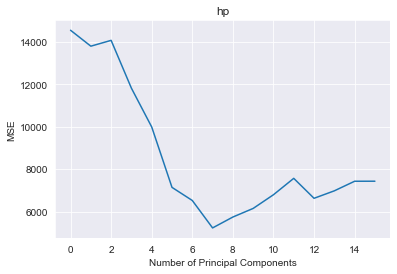

In [500]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = TimeSeriesSplit(n_splits = 20)

mse = []
regr = MLPRegressor(validation_data=(X_test, Y_test),random_state=10, epochs=100)


# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 16):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, n_jobs = -2,scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [501]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.88, 23.49, 30.99, 38.49, 45.99, 53.49, 60.99, 68.28, 75.57,
       82.86, 90.15, 96.43, 98.42, 99.99, 99.99, 99.99])

In [502]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr.fit(X_reduced_train[:,:1], Y_train)

#calculate RMSE
pred_PCA_ANN = regr.predict(X_reduced_test)
print("R-squared of the model in training set is: {}".format(regr.score(X_reduced_train[:,:1], Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regr.score(X_reduced_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mean_squared_error(Y_test, pred_PCA_ANN)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, pred_PCA_ANN)))

R-squared of the model in training set is: 0.11331584938744521
-----Test set statistics-----
R-squared of the model in test set is: 0.08983351143568918
Normalized Root mean squared error of the prediction is: 0.20041492655830873
Symmetric mean absolute percentage error of the prediction is: 57.7139579253325


C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



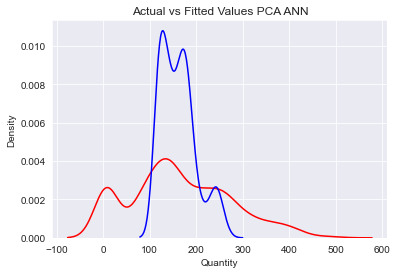

In [503]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(pred_PCA_ANN, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values PCA ANN')

plt.show()
plt.close()

Text(0.5, 1.0, 'hp')

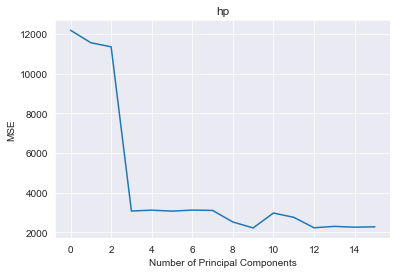

In [504]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = TimeSeriesSplit(n_splits = 20)

mse = []
regr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=14,random_state=10)


# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 16):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, n_jobs = -2,scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [505]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.88, 23.49, 30.99, 38.49, 45.99, 53.49, 60.99, 68.28, 75.57,
       82.86, 90.15, 96.43, 98.42, 99.99, 99.99, 99.99])

In [506]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr.fit(X_reduced_train[:,:1], Y_train)

#calculate RMSE
pred_PCA_DTR = regr.predict(X_reduced_test)

print("R-squared of the model in training set is: {}".format(regr.score(X_reduced_train[:,:1], Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regr.score(X_reduced_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mean_squared_error(Y_test, pred_PCA_DTR)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, pred_PCA_DTR)))

R-squared of the model in training set is: 0.7056264453337497
-----Test set statistics-----
R-squared of the model in test set is: -0.4193210676305621
Normalized Root mean squared error of the prediction is: 0.25027067672935355
Symmetric mean absolute percentage error of the prediction is: 70.25522059878176


C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



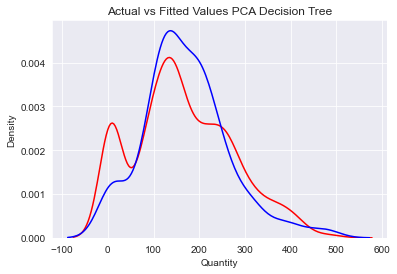

In [507]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(pred_PCA_DTR, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values PCA Decision Tree')

plt.show()
plt.close()

Text(0.5, 1.0, 'hp')

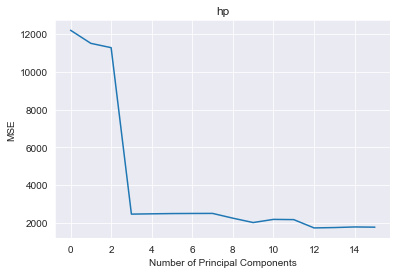

In [508]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = TimeSeriesSplit(n_splits = 20)

mse = []
regr = RandomForestRegressor(criterion='friedman_mse', max_depth=28,
                      n_estimators=93, random_state=10)


# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 16):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, n_jobs = -2,scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [509]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.88, 23.49, 30.99, 38.49, 45.99, 53.49, 60.99, 68.28, 75.57,
       82.86, 90.15, 96.43, 98.42, 99.99, 99.99, 99.99])

In [510]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr.fit(X_reduced_train[:,:1], Y_train)

#calculate RMSE
pred_PCA_RF = regr.predict(X_reduced_test)

print("R-squared of the model in training set is: {}".format(regr.score(X_reduced_train[:,:1], Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regr.score(X_reduced_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mean_squared_error(Y_test, pred_PCA_RF)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, pred_PCA_RF)))

R-squared of the model in training set is: 0.8274166667596832
-----Test set statistics-----
R-squared of the model in test set is: -0.21286163862795227
Normalized Root mean squared error of the prediction is: 0.23135307345613962
Symmetric mean absolute percentage error of the prediction is: 65.36880022470386


C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



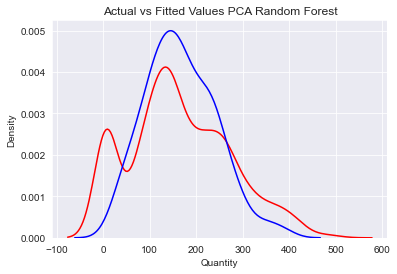

In [511]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(pred_PCA_RF, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values PCA Random Forest')

plt.show()
plt.close()

In [512]:
PCA_pred_df=pd.DataFrame({'Actual Value':Y_test,'PV PCA Tree':pred_PCA_DTR,'PV PCA Random':pred_PCA_RF,
                      'PV ANN':pred_PCA_ANN,'Abs Difference Value Tree':(abs(Y_test-pred_PCA_DTR)),'Abs Difference Value Random':(abs(Y_test-pred_PCA_RF)),
                     'Abs Difference Value ANN':(abs(Y_test-pred_PCA_ANN))})

In [513]:
PCA_pred_df.sample(10)

,Actual Value,PV PCA Tree,PV PCA Random,PV ANN,Abs Difference Value Tree,Abs Difference Value Random,Abs Difference Value ANN
1002,416.2,148.600000,231.796774,263.205292,267.600000,184.403226,152.994708
39,114.9,149.575000,160.133333,146.074417,34.675000,45.233333,31.174417
375,129.6,198.422523,37.424867,189.994171,68.822523,92.175133,60.394171
723,128.7,111.100000,76.210753,124.352745,17.600000,52.489247,4.347255
428,6.1,69.700000,50.875269,136.639740,63.600000,44.775269,130.539740
874,297.4,211.300000,157.447984,160.507706,86.100000,139.952016,136.892294
461,344.7,116.010000,65.915662,174.909637,228.690000,278.784338,169.790363
373,168.8,198.422523,238.440465,193.981049,29.622523,69.640465,25.181049
121,128.6,89.200000,136.566667,125.684196,39.400000,7.966667,2.915804
109,109.8,41.400000,101.515054,119.870483,68.400000,8.284946,10.070483


In [514]:
PCA_pred_df.tail()

,Actual Value,PV PCA Tree,PV PCA Random,PV ANN,Abs Difference Value Tree,Abs Difference Value Random,Abs Difference Value ANN
229,266.3,69.700000,102.951613,135.279999,196.600000,163.348387,131.020001
85,83.0,113.097531,79.889247,122.895760,30.097531,3.110753,39.895760
1002,416.2,148.600000,231.796774,263.205292,267.600000,184.403226,152.994708
1120,335.9,14.100000,81.882796,246.861023,321.800000,254.017204,89.038977
1026,219.6,8.900000,24.140393,174.396301,210.700000,195.459607,45.203699


In [515]:
PCA_pred_df.describe()

,Actual Value,PV PCA Tree,PV PCA Random,PV ANN,Abs Difference Value Tree,Abs Difference Value Random,Abs Difference Value ANN
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,169.794636,170.042698,166.818560,162.239639,97.810126,90.948220,82.458407
std,104.985584,93.272912,75.891755,37.564178,77.718093,71.166956,56.624110
min,2.800000,3.800000,14.038710,116.173851,1.100000,0.494146,0.178400
25%,99.200000,113.097531,112.711828,130.987823,39.400000,35.434409,36.484944
50%,157.300000,149.900000,160.734332,159.584045,81.700000,79.013978,71.514267
75%,243.000000,216.600000,221.576754,181.015976,137.041176,129.531685,122.499597
max,465.100000,480.900000,392.252688,263.205292,393.800000,322.401075,236.877075


# Code used to get twitter information

In [516]:
#from dotenv import dotenv_values

#config = dotenv_values(".env")

In [517]:
#config["API_KEY"]

In [518]:
#import requests
#import json

#bearer_token = config["BEARER_TOKEN"]

#search_url = "https://api.twitter.com/2/tweets/search/recent"

#query_params = {
#     'query' : "\"Moon landing\""
 #   'query' : '"Cattle" -is:retweet lang:en',
  #  'max_results' : "100",
   # 'tweet.fields': 'id,text,geo,conversation_id,created_at',
    #'user.fields': 'id,name,username,location',
    #'place.fields': 'full_name,country',
#     'next_token' : 'b26v89c19zqg8o3fqk0zknbt6j4akzvn71nbscgsfxh8d'
#}

#def bearer_oauth(r):
 #   r.headers["Authorization"] = f"Bearer {bearer_token}"
  #  r.headers["User-Agent"] = "v2RecentSearchPython"
   # return r

#def connect_to_endpoint(url, params):
 #   response = requests.get(url, auth=bearer_oauth, params=params)
  #  return response.json()

#json_response = connect_to_endpoint(search_url, query_params)
#
#parsedResponse = json.dumps(json_response, indent=4, ensure_ascii=False)
#print(parsedResponse)

In [519]:
#tweetList = []
#for tweet in json_response['data']:
 #   tweetList.append(tweet['text'])
#df_cattle_text = pd.DataFrame({'Tweets': tweetList})

In [520]:
#df_cattle_text

In [521]:
#df_cattle_text.to_csv('J:\My Drive\CA2\df_cattle_text.csv',index=False)

In [522]:
#read as we already got the file in csv
df_cattle_text = pd.read_csv('df_cattle_text.csv')

In [523]:
df_cattle_text['word_count'] = df_cattle_text['Tweets'].apply(lambda x: len(str(x).split(" ")))

In [524]:
df_cattle_text['char_count'] = df_cattle_text['Tweets'].str.len() 

In [525]:
glimpse(df_cattle_text)

100 rows and 3 columns


,Tweets,word_count,char_count
0,@WallStreetSilv Millennial are treating Gen Z ...,42,230
1,"@HRH_Ujuaku Snake and ant plenty for bush oh, ...",20,109
2,Ankole cattle! https://t.co/iosKJkN8NZ,3,38
3,@RobSchneider Vaccinate the cattle with covid ...,16,96
4,@RishiSunak Proud? Of treating the public like...,13,79


,Tweets,word_count,char_count
95,@1NF1N1TY_313 @MeggGawat @mhdksafa I encourage...,32,202
96,@LPNational the goyim are thought of as cattle,8,46
97,Cowboys with herd of cattle - made with NightC...,18,144
98,@ntvkenya 1.County https://t.co/l1yMNI0KJn sho...,31,262
99,Having a genuine passion towards the cattle se...,32,278


In [526]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [527]:
df_cattle_text['avg_word'] = df_cattle_text['Tweets'].apply(lambda x: avg_word(x))

In [528]:
glimpse(df_cattle_text)

100 rows and 4 columns


,Tweets,word_count,char_count,avg_word
0,@WallStreetSilv Millennial are treating Gen Z ...,42,230,4.500000
1,"@HRH_Ujuaku Snake and ant plenty for bush oh, ...",20,109,4.500000
2,Ankole cattle! https://t.co/iosKJkN8NZ,3,38,12.000000
3,@RobSchneider Vaccinate the cattle with covid ...,16,96,5.062500
4,@RishiSunak Proud? Of treating the public like...,13,79,5.153846


,Tweets,word_count,char_count,avg_word
95,@1NF1N1TY_313 @MeggGawat @mhdksafa I encourage...,32,202,5.343750
96,@LPNational the goyim are thought of as cattle,8,46,4.875000
97,Cowboys with herd of cattle - made with NightC...,18,144,7.470588
98,@ntvkenya 1.County https://t.co/l1yMNI0KJn sho...,31,262,7.218750
99,Having a genuine passion towards the cattle se...,32,278,7.147059


In [529]:
stop = stopwords.words('english')

In [530]:
df_cattle_text['stopwords'] = df_cattle_text['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [531]:
glimpse(df_cattle_text)

100 rows and 5 columns


,Tweets,word_count,char_count,avg_word,stopwords
0,@WallStreetSilv Millennial are treating Gen Z ...,42,230,4.500000,17
1,"@HRH_Ujuaku Snake and ant plenty for bush oh, ...",20,109,4.500000,7
2,Ankole cattle! https://t.co/iosKJkN8NZ,3,38,12.000000,0
3,@RobSchneider Vaccinate the cattle with covid ...,16,96,5.062500,5
4,@RishiSunak Proud? Of treating the public like...,13,79,5.153846,2


,Tweets,word_count,char_count,avg_word,stopwords
95,@1NF1N1TY_313 @MeggGawat @mhdksafa I encourage...,32,202,5.343750,7
96,@LPNational the goyim are thought of as cattle,8,46,4.875000,4
97,Cowboys with herd of cattle - made with NightC...,18,144,7.470588,3
98,@ntvkenya 1.County https://t.co/l1yMNI0KJn sho...,31,262,7.218750,12
99,Having a genuine passion towards the cattle se...,32,278,7.147059,9


In [532]:
df_cattle_text['hashtags'] = df_cattle_text['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

In [533]:
glimpse(df_cattle_text)

100 rows and 6 columns


,Tweets,word_count,char_count,avg_word,stopwords,hashtags
0,@WallStreetSilv Millennial are treating Gen Z ...,42,230,4.500000,17,0
1,"@HRH_Ujuaku Snake and ant plenty for bush oh, ...",20,109,4.500000,7,0
2,Ankole cattle! https://t.co/iosKJkN8NZ,3,38,12.000000,0,0
3,@RobSchneider Vaccinate the cattle with covid ...,16,96,5.062500,5,0
4,@RishiSunak Proud? Of treating the public like...,13,79,5.153846,2,0


,Tweets,word_count,char_count,avg_word,stopwords,hashtags
95,@1NF1N1TY_313 @MeggGawat @mhdksafa I encourage...,32,202,5.343750,7,0
96,@LPNational the goyim are thought of as cattle,8,46,4.875000,4,0
97,Cowboys with herd of cattle - made with NightC...,18,144,7.470588,3,4
98,@ntvkenya 1.County https://t.co/l1yMNI0KJn sho...,31,262,7.218750,12,0
99,Having a genuine passion towards the cattle se...,32,278,7.147059,9,4


In [534]:
df_cattle_text['numerics'] = df_cattle_text['Tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [535]:
glimpse(df_cattle_text)

100 rows and 7 columns


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics
0,@WallStreetSilv Millennial are treating Gen Z ...,42,230,4.500000,17,0,0
1,"@HRH_Ujuaku Snake and ant plenty for bush oh, ...",20,109,4.500000,7,0,0
2,Ankole cattle! https://t.co/iosKJkN8NZ,3,38,12.000000,0,0,0
3,@RobSchneider Vaccinate the cattle with covid ...,16,96,5.062500,5,0,0
4,@RishiSunak Proud? Of treating the public like...,13,79,5.153846,2,0,0


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics
95,@1NF1N1TY_313 @MeggGawat @mhdksafa I encourage...,32,202,5.343750,7,0,0
96,@LPNational the goyim are thought of as cattle,8,46,4.875000,4,0,0
97,Cowboys with herd of cattle - made with NightC...,18,144,7.470588,3,4,0
98,@ntvkenya 1.County https://t.co/l1yMNI0KJn sho...,31,262,7.218750,12,0,0
99,Having a genuine passion towards the cattle se...,32,278,7.147059,9,4,0


In [536]:
df_cattle_text['upper'] = df_cattle_text['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [537]:
glimpse(df_cattle_text)

100 rows and 8 columns


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,@WallStreetSilv Millennial are treating Gen Z ...,42,230,4.500000,17,0,0,2
1,"@HRH_Ujuaku Snake and ant plenty for bush oh, ...",20,109,4.500000,7,0,0,0
2,Ankole cattle! https://t.co/iosKJkN8NZ,3,38,12.000000,0,0,0,0
3,@RobSchneider Vaccinate the cattle with covid ...,16,96,5.062500,5,0,0,0
4,@RishiSunak Proud? Of treating the public like...,13,79,5.153846,2,0,0,0


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
95,@1NF1N1TY_313 @MeggGawat @mhdksafa I encourage...,32,202,5.343750,7,0,0,4
96,@LPNational the goyim are thought of as cattle,8,46,4.875000,4,0,0,0
97,Cowboys with herd of cattle - made with NightC...,18,144,7.470588,3,4,0,0
98,@ntvkenya 1.County https://t.co/l1yMNI0KJn sho...,31,262,7.218750,12,0,0,0
99,Having a genuine passion towards the cattle se...,32,278,7.147059,9,4,0,0


In [538]:
df_cattle_text['Tweets'] = df_cattle_text['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [539]:
glimpse(df_cattle_text)

100 rows and 8 columns


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,@wallstreetsilv millennial are treating gen z ...,42,230,4.500000,17,0,0,2
1,"@hrh_ujuaku snake and ant plenty for bush oh, ...",20,109,4.500000,7,0,0,0
2,ankole cattle! https://t.co/ioskjkn8nz,3,38,12.000000,0,0,0,0
3,@robschneider vaccinate the cattle with covid ...,16,96,5.062500,5,0,0,0
4,@rishisunak proud? of treating the public like...,13,79,5.153846,2,0,0,0


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
95,@1nf1n1ty_313 @megggawat @mhdksafa i encourage...,32,202,5.343750,7,0,0,4
96,@lpnational the goyim are thought of as cattle,8,46,4.875000,4,0,0,0
97,cowboys with herd of cattle - made with nightc...,18,144,7.470588,3,4,0,0
98,@ntvkenya 1.county https://t.co/l1ymni0kjn sho...,31,262,7.218750,12,0,0,0
99,having a genuine passion towards the cattle se...,32,278,7.147059,9,4,0,0


In [540]:
df_cattle_text['Tweets'] = df_cattle_text['Tweets'].str.replace('[^\w\s]','')

C:\Users\krist\AppData\Local\Temp\ipykernel_8248\41563395.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [541]:
glimpse(df_cattle_text)

100 rows and 8 columns


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,wallstreetsilv millennial are treating gen z t...,42,230,4.500000,17,0,0,2
1,hrh_ujuaku snake and ant plenty for bush oh wh...,20,109,4.500000,7,0,0,0
2,ankole cattle httpstcoioskjkn8nz,3,38,12.000000,0,0,0,0
3,robschneider vaccinate the cattle with covid v...,16,96,5.062500,5,0,0,0
4,rishisunak proud of treating the public like c...,13,79,5.153846,2,0,0,0


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
95,1nf1n1ty_313 megggawat mhdksafa i encourage me...,32,202,5.343750,7,0,0,4
96,lpnational the goyim are thought of as cattle,8,46,4.875000,4,0,0,0
97,cowboys with herd of cattle made with nightca...,18,144,7.470588,3,4,0,0
98,ntvkenya 1county httpstcol1ymni0kjn should not...,31,262,7.218750,12,0,0,0
99,having a genuine passion towards the cattle se...,32,278,7.147059,9,4,0,0


In [542]:
freq = pd.Series(' '.join(df_cattle_text['Tweets']).split()).value_counts()[:10]
freq

the       109
cattle    105
to         59
and        55
in         51
a          46
of         45
for        29
are        25
is         22
dtype: int64

In [543]:
freq = list(freq.index)
df_cattle_text['Tweets'] = df_cattle_text['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_cattle_text['Tweets'].head()

0    wallstreetsilv millennial treating gen z same ...
1    hrh_ujuaku snake ant plenty bush oh why not go...
2                            ankole httpstcoioskjkn8nz
3    robschneider vaccinate with covid vax people e...
4    rishisunak proud treating public like im sure ...
Name: Tweets, dtype: object

In [544]:
freq = pd.Series(' '.join(df_cattle_text['Tweets']).split()).value_counts()[-10:]
freq

fifi_dvc              1
nap_africa            1
faolivestock          1
richardmuhire4        1
agribnews             1
smartagricultur       1
coumbadsow            1
biggerolder           1
better                1
httpstcof1t812dwwr    1
dtype: int64

In [545]:
freq = list(freq.index)
df_cattle_text['Tweets'] = df_cattle_text['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_cattle_text['Tweets'].head()

0    wallstreetsilv millennial treating gen z same ...
1    hrh_ujuaku snake ant plenty bush oh why not go...
2                            ankole httpstcoioskjkn8nz
3    robschneider vaccinate with covid vax people e...
4    rishisunak proud treating public like im sure ...
Name: Tweets, dtype: object

In [546]:
df_cattle_text['Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    wallstreetsilv millennium treating gen z same ...
1    hrh_ujuaku snake ant plenty bush oh why not go...
2                             ankle httpstcoioskjkn8nz
3    robschneider vaccine with could tax people eat...
4    rishisunak proud treating public like in sure ...
Name: Tweets, dtype: object

In [547]:
st = PorterStemmer()
df_cattle_text['Tweets'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    wallstreetsilv millenni treat gen z same as bo...
1    hrh_ujuaku snake ant plenti bush oh whi not go...
2                             ankol httpstcoioskjkn8nz
3    robschneid vaccin with covid vax peopl eat end...
4    rishisunak proud treat public like im sure you...
Name: Tweets, dtype: object

In [548]:
df_cattle_text['Tweets'] = df_cattle_text['Tweets'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_cattle_text['Tweets'].head()

0    wallstreetsilv millennial treating gen z same ...
1    hrh_ujuaku snake ant plenty bush oh why not go...
2                            ankole httpstcoioskjkn8nz
3    robschneider vaccinate with covid vax people e...
4    rishisunak proud treating public like im sure ...
Name: Tweets, dtype: object

In [549]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df_cattle_text['Tweets'])

train_vect

<100x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1343 stored elements in Compressed Sparse Row format>

In [550]:
print(train_vect)

  (0, 231)	0.23032399738581164
  (0, 812)	0.23032399738581164
  (0, 335)	0.21135023663592098
  (0, 191)	0.23032399738581164
  (0, 363)	0.1717008893421647
  (0, 297)	0.21135023663592098
  (0, 870)	0.23032399738581164
  (0, 979)	0.21135023663592098
  (0, 308)	0.23032399738581164
  (0, 707)	0.21135023663592098
  (0, 482)	0.19788813914447254
  (0, 280)	0.18744612509480169
  (0, 906)	0.21135023663592098
  (0, 127)	0.23032399738581164
  (0, 361)	0.46064799477162327
  (0, 907)	0.21135023663592098
  (0, 550)	0.23032399738581164
  (0, 948)	0.21135023663592098
  (1, 386)	0.30854265764754496
  (1, 516)	0.30854265764754496
  (1, 648)	0.2831253557867508
  (1, 699)	0.25110334250410604
  (1, 608)	0.30854265764754496
  (1, 614)	0.30854265764754496
  (1, 144)	0.30854265764754496
  :	:
  (98, 407)	0.24403438584849743
  (98, 6)	0.24403438584849743
  (98, 602)	0.24403438584849743
  (98, 139)	0.22393118295001768
  (98, 642)	0.22393118295001768
  (98, 385)	0.22393118295001768
  (98, 846)	0.19860414258340076

In [551]:
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df_cattle_text['Tweets'])
train_bow

<100x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1707 stored elements in Compressed Sparse Row format>

In [552]:
print(train_bow)

  (0, 928)	1
  (0, 883)	1
  (0, 347)	2
  (0, 707)	1
  (0, 147)	1
  (0, 882)	1
  (0, 850)	2
  (0, 855)	1
  (0, 306)	1
  (0, 448)	1
  (0, 849)	1
  (0, 658)	1
  (0, 957)	1
  (0, 974)	1
  (0, 833)	1
  (0, 536)	1
  (0, 949)	1
  (0, 325)	1
  (0, 352)	1
  (0, 215)	1
  (0, 340)	1
  (0, 769)	1
  (0, 843)	1
  (0, 991)	1
  (0, 349)	1
  :	:
  (98, 776)	1
  (98, 780)	1
  (98, 310)	1
  (98, 395)	1
  (99, 991)	1
  (99, 845)	1
  (99, 960)	1
  (99, 86)	1
  (99, 905)	1
  (99, 362)	1
  (99, 412)	1
  (99, 361)	1
  (99, 423)	1
  (99, 911)	1
  (99, 585)	1
  (99, 875)	1
  (99, 727)	1
  (99, 629)	1
  (99, 965)	1
  (99, 127)	1
  (99, 633)	1
  (99, 378)	1
  (99, 724)	1
  (99, 50)	1
  (99, 51)	1


In [553]:
print(train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [554]:
df_cattle_text['Tweets'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (0.10000000000000002, 0.47500000000000003)
1                                 (0.55, 0.825)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4     (0.43333333333333335, 0.6518518518518518)
Name: Tweets, dtype: object

In [555]:
df_cattle_text['sentiment'] = df_cattle_text['Tweets'].apply(lambda x: TextBlob(x).sentiment[0] )
df_cattle_text[['Tweets','sentiment']].head()

,Tweets,sentiment
0,wallstreetsilv millennial treating gen z same ...,0.100000
1,hrh_ujuaku snake ant plenty bush oh why not go...,0.550000
2,ankole httpstcoioskjkn8nz,0.000000
3,robschneider vaccinate with covid vax people e...,0.000000
4,rishisunak proud treating public like im sure ...,0.433333


In [556]:
glimpse(df_cattle_text)

100 rows and 9 columns


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment
0,wallstreetsilv millennial treating gen z same ...,42,230,4.500000,17,0,0,2,0.100000
1,hrh_ujuaku snake ant plenty bush oh why not go...,20,109,4.500000,7,0,0,0,0.550000
2,ankole httpstcoioskjkn8nz,3,38,12.000000,0,0,0,0,0.000000
3,robschneider vaccinate with covid vax people e...,16,96,5.062500,5,0,0,0,0.000000
4,rishisunak proud treating public like im sure ...,13,79,5.153846,2,0,0,0,0.433333


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment
95,1nf1n1ty_313 megggawat mhdksafa i encourage me...,32,202,5.343750,7,0,0,4,0.4000
96,lpnational goy thought a,8,46,4.875000,4,0,0,0,0.0000
97,cowboy with herd made with nightcafe creator h...,18,144,7.470588,3,4,0,0,0.0000
98,ntvkenya 1county httpstcol1ymni0kjn should not...,31,262,7.218750,12,0,0,0,0.0000
99,having genuine passion towards sector will mea...,32,278,7.147059,9,4,0,0,0.1125


In [557]:
df_cattle_text.describe()

,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000
mean,26.220000,172.190000,5.824363,8.24000,0.420000,0.21000,0.980000,0.084388
std,13.951272,88.105733,1.617561,6.12351,1.055816,0.53739,2.628438,0.203385
min,2.000000,23.000000,3.727273,0.00000,0.000000,0.00000,0.000000,-0.600000
25%,15.000000,94.000000,4.725075,3.00000,0.000000,0.00000,0.000000,0.000000
50%,24.000000,161.000000,5.329167,7.00000,0.000000,0.00000,0.000000,0.000000
75%,36.250000,257.500000,6.555556,12.00000,0.000000,0.00000,1.000000,0.200000
max,59.000000,378.000000,12.100000,23.00000,6.000000,3.00000,19.000000,0.600000


In [558]:
df_cattle_text['sentiment_valuation'] = df_cattle_text['sentiment'].apply(lambda x: 'Bad' if x < 0 else 'Good' if x > 0 else 'Neutral')


In [559]:
glimpse(df_cattle_text)

100 rows and 10 columns


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment,sentiment_valuation
0,wallstreetsilv millennial treating gen z same ...,42,230,4.500000,17,0,0,2,0.100000,Good
1,hrh_ujuaku snake ant plenty bush oh why not go...,20,109,4.500000,7,0,0,0,0.550000,Good
2,ankole httpstcoioskjkn8nz,3,38,12.000000,0,0,0,0,0.000000,Neutral
3,robschneider vaccinate with covid vax people e...,16,96,5.062500,5,0,0,0,0.000000,Neutral
4,rishisunak proud treating public like im sure ...,13,79,5.153846,2,0,0,0,0.433333,Good


,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment,sentiment_valuation
95,1nf1n1ty_313 megggawat mhdksafa i encourage me...,32,202,5.343750,7,0,0,4,0.4000,Good
96,lpnational goy thought a,8,46,4.875000,4,0,0,0,0.0000,Neutral
97,cowboy with herd made with nightcafe creator h...,18,144,7.470588,3,4,0,0,0.0000,Neutral
98,ntvkenya 1county httpstcol1ymni0kjn should not...,31,262,7.218750,12,0,0,0,0.0000,Neutral
99,having genuine passion towards sector will mea...,32,278,7.147059,9,4,0,0,0.1125,Good


In [560]:
df_cattle_text.sample(20)

,Tweets,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment,sentiment_valuation
88,removal 31 deceased okanagan lake getting unde...,15,124,7.333333,2,0,1,0,0.000000,Neutral
55,one day we will all match his farm braai all a...,15,72,3.866667,8,0,0,0,0.000000,Neutral
44,over 13 million affected by famine oromia ethi...,36,271,6.555556,6,2,1,1,0.000000,Neutral
37,protesterlone amlivemon they think u a about 7...,19,116,5.157895,8,0,0,0,0.250000,Good
54,stillgray this man who will help you get on train,14,71,4.142857,6,0,0,0,0.000000,Neutral
43,over 13 million affected by famine oromia ethi...,36,271,6.555556,6,2,1,1,0.000000,Neutral
89,iisheldonii politicsls grosser subtext value w...,44,256,4.711111,21,0,0,0,0.033333,Good
53,frostnova1223 hochiminh01 samibcn_fi windowles...,53,378,6.150943,16,0,0,2,0.000000,Neutral
30,federal regulator have ordered union pacific r...,29,213,6.133333,9,2,0,0,-0.050000,Bad
70,roamer99 bridostevenson kilsally samuelmarclow...,46,292,5.127660,17,0,0,3,0.400000,Good


Text(0.5, 1.0, 'Sentiment Valuation Frequencies')

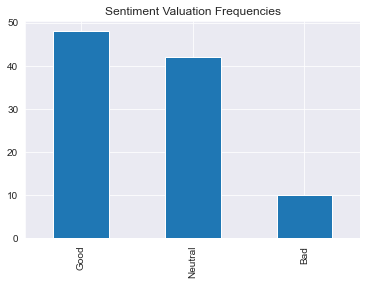

In [561]:
df_cattle_text['sentiment_valuation'].value_counts().plot(kind='bar')
plt.title('Sentiment Valuation Frequencies')

In [562]:
df_cattle_text['sentiment_valuation'].value_counts()

Good       48
Neutral    42
Bad        10
Name: sentiment_valuation, dtype: int64

In [563]:
df_world_cattle = pd.read_excel('cattle 1991-2022 Europe.xlsx', sheet_name = 'Sheet 1',skiprows=9, usecols = ['TIME','1991','1992','1993',
        '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
        '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'],skipfooter = 8)

C:\Users\krist\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [564]:
glimpse(df_world_cattle)

40 rows and 33 columns


,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2,European Union - 28 countries (2013-2020),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
3,European Union - 27 countries (2007-2013),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
4,European Union - 25 countries (2004-2006),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:


,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
35,United Kingdom,12002.73,11924.33,11850.82,11954.22,11856.53,12039.66,11632.52,11518.81,11423.36,...,9843.0,9837.0,9919.0,10033.0,10004.0,9891.0,9739.0,9615.0,:,:
36,Montenegro,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
37,North Macedonia,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
38,Albania,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
39,Serbia,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:


In [565]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TIME    40 non-null     object
 1   1991    39 non-null     object
 2   1992    39 non-null     object
 3   1993    39 non-null     object
 4   1994    39 non-null     object
 5   1995    39 non-null     object
 6   1996    39 non-null     object
 7   1997    39 non-null     object
 8   1998    39 non-null     object
 9   1999    39 non-null     object
 10  2000    39 non-null     object
 11  2001    39 non-null     object
 12  2002    39 non-null     object
 13  2003    39 non-null     object
 14  2004    39 non-null     object
 15  2005    39 non-null     object
 16  2006    39 non-null     object
 17  2007    39 non-null     object
 18  2008    39 non-null     object
 19  2009    39 non-null     object
 20  2010    39 non-null     object
 21  2011    39 non-null     object
 22  2012    39 non-null     obje

In [566]:
df_world_cattle = df_world_cattle.dropna()

In [567]:
df_world_cattle.head()

,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,European Union - 27 countries (from 2020),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2,European Union - 28 countries (2013-2020),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
3,European Union - 27 countries (2007-2013),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
4,European Union - 25 countries (2004-2006),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
5,European Union - 15 countries (1995-2004),:,:,86602.37,86510.02,86516.1,87552.55,85787.24,85119.68,:,...,:,:,:,:,:,:,:,:,:,:


In [568]:
nan_value = float("NaN")
df_world_cattle = df_world_cattle.replace(':',nan_value,regex = True)

In [569]:
df_world_cattle.head()

,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,European Union - 27 countries (from 2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,European Union - 28 countries (2013-2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,European Union - 27 countries (2007-2013),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,European Union - 25 countries (2004-2006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,European Union - 15 countries (1995-2004),NaN,NaN,86602.37,86510.02,86516.1,87552.55,85787.24,85119.68,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [570]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 39
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    39 non-null     object 
 1   1991    16 non-null     float64
 2   1992    19 non-null     float64
 3   1993    22 non-null     float64
 4   1994    23 non-null     float64
 5   1995    23 non-null     float64
 6   1996    22 non-null     float64
 7   1997    24 non-null     float64
 8   1998    24 non-null     float64
 9   1999    21 non-null     float64
 10  2000    21 non-null     float64
 11  2001    21 non-null     float64
 12  2002    22 non-null     float64
 13  2003    23 non-null     float64
 14  2004    20 non-null     float64
 15  2005    17 non-null     float64
 16  2006    18 non-null     float64
 17  2007    17 non-null     float64
 18  2008    16 non-null     float64
 19  2009    14 non-null     float64
 20  2010    13 non-null     float64
 21  2011    13 non-null     float64
 22  2012

In [571]:
df_world_cattle = df_world_cattle.dropna()

In [572]:
df_world_cattle

,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,Belgium,3264.16,3222.00,3231.07,3251.96,3286.18,3242.60,3157.00,3089.91,3085.17,...,2432.53,2520.77,2531.08,2554.76,2454.10,2449.74,2406.17,2387.91,2353.42,2240.62
9,Denmark,2222.00,2190.00,2195.00,2106.00,2089.00,2094.00,2003.00,1977.00,1887.00,...,1603.00,1585.00,1568.00,1583.00,1565.00,1560.00,1512.00,1517.00,1503.00,1484.00
10,Germany (until 1990 former territory of the FRG),18455.63,16775.48,16150.72,16022.86,16097.87,15965.01,15612.23,15169.75,14895.81,...,12587.02,12702.05,12653.07,12563.18,12365.50,12093.38,11763.43,11423.46,11176.24,10986.30
12,Ireland,6911.90,6951.30,6981.70,6996.40,7033.90,7313.60,7532.70,7640.10,7387.10,...,6902.65,6926.10,6963.52,7221.20,7363.50,7348.50,7208.62,7314.43,7358.88,7396.15
14,Spain,5328.90,5107.27,5044.27,5202.67,5614.00,5947.00,5950.00,6249.00,6163.00,...,5821.97,6008.26,6233.86,6451.22,6588.11,6724.58,6721.90,6714.97,6922.95,6753.70
15,France,21937.00,21597.00,21190.00,21242.00,21241.20,21626.00,20887.00,20713.00,20494.00,...,19179.20,19285.60,19462.90,19559.30,19432.72,18736.99,18469.77,18200.48,17862.57,17415.61
17,Italy,8228.90,7970.40,7568.00,7533.00,7273.00,7361.00,7309.00,7333.00,7261.00,...,6052.85,6197.10,6146.32,6183.18,6118.29,6170.29,6016.06,6115.87,6173.66,6086.97
24,Netherlands,5062.07,4923.86,4796.00,4717.00,4657.00,4552.00,4411.00,4277.00,4178.00,...,4000.00,4068.00,4133.85,4244.52,4096.11,3897.13,3749.97,3766.30,3731.75,3766.14
26,Poland,8844.00,8221.40,7642.60,7695.70,7305.60,7136.50,7307.40,6955.30,6555.00,...,5859.54,5920.41,5960.69,5939.00,6143.00,6201.00,6358.00,6344.00,6401.00,6444.09


In [573]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 6 to 26
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    9 non-null      object 
 1   1991    9 non-null      float64
 2   1992    9 non-null      float64
 3   1993    9 non-null      float64
 4   1994    9 non-null      float64
 5   1995    9 non-null      float64
 6   1996    9 non-null      float64
 7   1997    9 non-null      float64
 8   1998    9 non-null      float64
 9   1999    9 non-null      float64
 10  2000    9 non-null      float64
 11  2001    9 non-null      float64
 12  2002    9 non-null      float64
 13  2003    9 non-null      float64
 14  2004    9 non-null      float64
 15  2005    9 non-null      float64
 16  2006    9 non-null      float64
 17  2007    9 non-null      float64
 18  2008    9 non-null      float64
 19  2009    9 non-null      float64
 20  2010    9 non-null      float64
 21  2011    9 non-null      float64
 22  2012 

In [574]:
df_world_cattle.rename(columns = {'TIME':'Country'}, inplace = True)

In [575]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 6 to 26
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  9 non-null      object 
 1   1991     9 non-null      float64
 2   1992     9 non-null      float64
 3   1993     9 non-null      float64
 4   1994     9 non-null      float64
 5   1995     9 non-null      float64
 6   1996     9 non-null      float64
 7   1997     9 non-null      float64
 8   1998     9 non-null      float64
 9   1999     9 non-null      float64
 10  2000     9 non-null      float64
 11  2001     9 non-null      float64
 12  2002     9 non-null      float64
 13  2003     9 non-null      float64
 14  2004     9 non-null      float64
 15  2005     9 non-null      float64
 16  2006     9 non-null      float64
 17  2007     9 non-null      float64
 18  2008     9 non-null      float64
 19  2009     9 non-null      float64
 20  2010     9 non-null      float64
 21  2011     9 non-null

In [576]:
df_world_cattle

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,Belgium,3264.16,3222.00,3231.07,3251.96,3286.18,3242.60,3157.00,3089.91,3085.17,...,2432.53,2520.77,2531.08,2554.76,2454.10,2449.74,2406.17,2387.91,2353.42,2240.62
9,Denmark,2222.00,2190.00,2195.00,2106.00,2089.00,2094.00,2003.00,1977.00,1887.00,...,1603.00,1585.00,1568.00,1583.00,1565.00,1560.00,1512.00,1517.00,1503.00,1484.00
10,Germany (until 1990 former territory of the FRG),18455.63,16775.48,16150.72,16022.86,16097.87,15965.01,15612.23,15169.75,14895.81,...,12587.02,12702.05,12653.07,12563.18,12365.50,12093.38,11763.43,11423.46,11176.24,10986.30
12,Ireland,6911.90,6951.30,6981.70,6996.40,7033.90,7313.60,7532.70,7640.10,7387.10,...,6902.65,6926.10,6963.52,7221.20,7363.50,7348.50,7208.62,7314.43,7358.88,7396.15
14,Spain,5328.90,5107.27,5044.27,5202.67,5614.00,5947.00,5950.00,6249.00,6163.00,...,5821.97,6008.26,6233.86,6451.22,6588.11,6724.58,6721.90,6714.97,6922.95,6753.70
15,France,21937.00,21597.00,21190.00,21242.00,21241.20,21626.00,20887.00,20713.00,20494.00,...,19179.20,19285.60,19462.90,19559.30,19432.72,18736.99,18469.77,18200.48,17862.57,17415.61
17,Italy,8228.90,7970.40,7568.00,7533.00,7273.00,7361.00,7309.00,7333.00,7261.00,...,6052.85,6197.10,6146.32,6183.18,6118.29,6170.29,6016.06,6115.87,6173.66,6086.97
24,Netherlands,5062.07,4923.86,4796.00,4717.00,4657.00,4552.00,4411.00,4277.00,4178.00,...,4000.00,4068.00,4133.85,4244.52,4096.11,3897.13,3749.97,3766.30,3731.75,3766.14
26,Poland,8844.00,8221.40,7642.60,7695.70,7305.60,7136.50,7307.40,6955.30,6555.00,...,5859.54,5920.41,5960.69,5939.00,6143.00,6201.00,6358.00,6344.00,6401.00,6444.09


In [577]:
df_world_cattle.isna().sum().sum()

0

In [578]:
idf_world_cattle = df_world_cattle
df_world_cattle.rename(columns = {'Country':'Year'}, inplace = True)
df_world_cattle = df_world_cattle.set_index('Year').T

In [579]:
df_world_cattle

Year,Belgium,Denmark,Germany (until 1990 former territory of the FRG),Ireland,Spain,France,Italy,Netherlands,Poland
1991,3264.16,2222.0,18455.63,6911.90,5328.90,21937.00,8228.90,5062.07,8844.00
1992,3222.00,2190.0,16775.48,6951.30,5107.27,21597.00,7970.40,4923.86,8221.40
1993,3231.07,2195.0,16150.72,6981.70,5044.27,21190.00,7568.00,4796.00,7642.60
1994,3251.96,2106.0,16022.86,6996.40,5202.67,21242.00,7533.00,4717.00,7695.70
1995,3286.18,2089.0,16097.87,7033.90,5614.00,21241.20,7273.00,4657.00,7305.60
1996,3242.60,2094.0,15965.01,7313.60,5947.00,21626.00,7361.00,4552.00,7136.50
1997,3157.00,2003.0,15612.23,7532.70,5950.00,20887.00,7309.00,4411.00,7307.40
1998,3089.91,1977.0,15169.75,7640.10,6249.00,20713.00,7333.00,4277.00,6955.30
1999,3085.17,1887.0,14895.81,7387.10,6163.00,20494.00,7261.00,4178.00,6555.00
2000,3041.57,1868.0,14537.93,7037.40,6028.72,20589.50,7245.00,4058.00,6082.60


In [580]:
df_world_cattle.columns

Index(['Belgium', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Spain',
       'France', 'Italy', 'Netherlands', 'Poland'],
      dtype='object', name='Year')

In [581]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Belgium                                           32 non-null     float64
 1   Denmark                                           32 non-null     float64
 2   Germany (until 1990 former territory of the FRG)  32 non-null     float64
 3   Ireland                                           32 non-null     float64
 4   Spain                                             32 non-null     float64
 5   France                                            32 non-null     float64
 6   Italy                                             32 non-null     float64
 7   Netherlands                                       32 non-null     float64
 8   Poland                                            32 non-null     float64
dtypes: float64(9)
memory usa

In [582]:
df_world_cattle.rename(columns = {'Germany (until 1990 former territory of the FRG)':'Germany'}, inplace = True)

In [583]:
df_world_cattle

Year,Belgium,Denmark,Germany,Ireland,Spain,France,Italy,Netherlands,Poland
1991,3264.16,2222.0,18455.63,6911.90,5328.90,21937.00,8228.90,5062.07,8844.00
1992,3222.00,2190.0,16775.48,6951.30,5107.27,21597.00,7970.40,4923.86,8221.40
1993,3231.07,2195.0,16150.72,6981.70,5044.27,21190.00,7568.00,4796.00,7642.60
1994,3251.96,2106.0,16022.86,6996.40,5202.67,21242.00,7533.00,4717.00,7695.70
1995,3286.18,2089.0,16097.87,7033.90,5614.00,21241.20,7273.00,4657.00,7305.60
1996,3242.60,2094.0,15965.01,7313.60,5947.00,21626.00,7361.00,4552.00,7136.50
1997,3157.00,2003.0,15612.23,7532.70,5950.00,20887.00,7309.00,4411.00,7307.40
1998,3089.91,1977.0,15169.75,7640.10,6249.00,20713.00,7333.00,4277.00,6955.30
1999,3085.17,1887.0,14895.81,7387.10,6163.00,20494.00,7261.00,4178.00,6555.00
2000,3041.57,1868.0,14537.93,7037.40,6028.72,20589.50,7245.00,4058.00,6082.60


<AxesSubplot:>

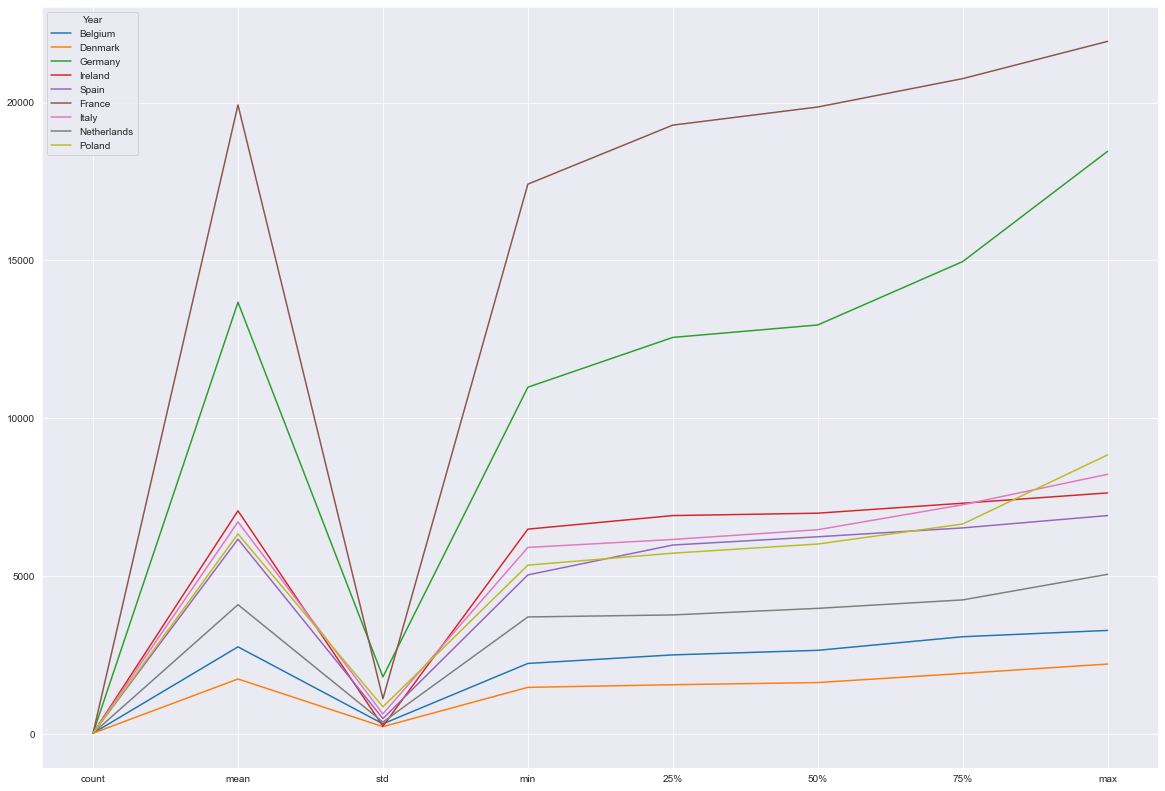

In [584]:
df_world_cattle.describe().plot(figsize=(20,14))

In [585]:
df_world_cattle.describe()

Year,Belgium,Denmark,Germany,Ireland,Spain,France,Italy,Netherlands,Poland
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2765.848750,1749.187500,13676.901562,7073.561250,6176.278438,19923.637188,6721.298750,4100.820000,6341.604688
std,328.918454,239.487819,1815.322200,256.370315,495.508794,1123.019992,643.023612,383.770699,867.073470
min,2240.620000,1484.000000,10986.300000,6493.010000,5044.270000,17415.610000,5913.730000,3713.000000,5353.420000
25%,2511.645000,1567.250000,12563.035000,6922.550000,5989.772500,19284.575000,6165.550000,3776.575000,5731.740000
50%,2656.235000,1635.500000,12957.285000,6997.955000,6251.000000,19858.150000,6474.620000,3985.000000,6021.645000
75%,3086.355000,1924.500000,14964.295000,7313.807500,6532.452500,20756.500000,7264.000000,4252.640000,6655.075000
max,3286.180000,2222.000000,18455.630000,7640.100000,6922.950000,21937.000000,8228.900000,5062.070000,8844.000000


Text(0, 0.5, 'Volume')

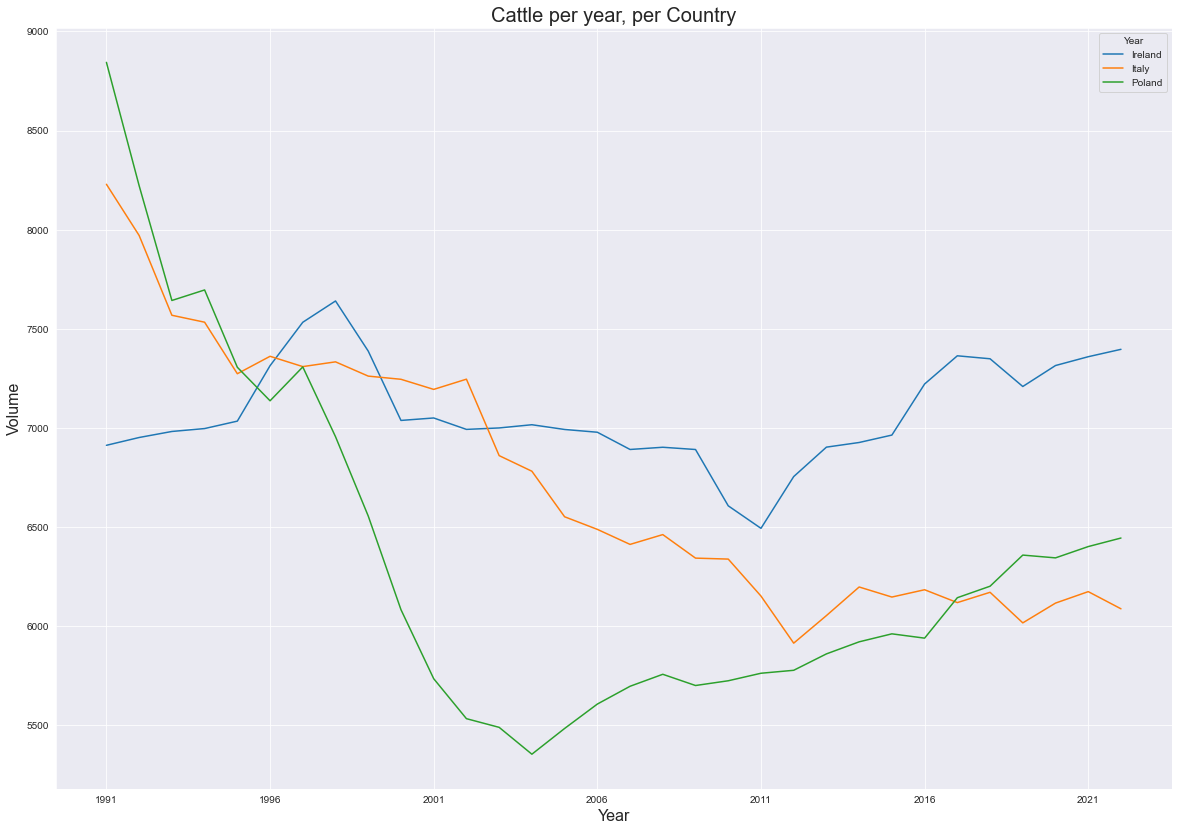

In [586]:
df_world_cattle.plot(y=["Ireland", "Italy","Poland"], kind="line", figsize=(20, 14))
plt.title('Cattle per year, per Country',fontsize=20)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Volume', fontsize=16)


Text(0, 0.5, 'Volume')

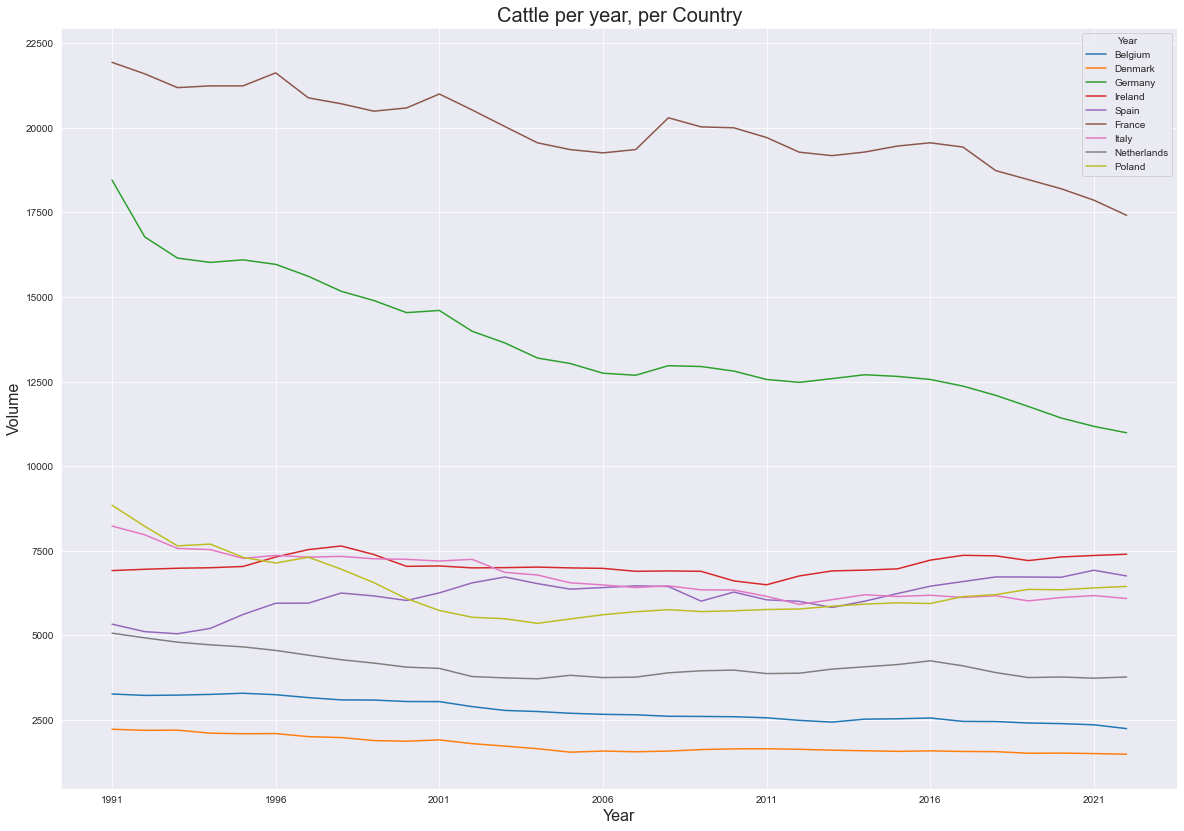

In [587]:
df_world_cattle.plot(kind="line", figsize=(20, 14))
plt.title('Cattle per year, per Country',fontsize=20)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Volume', fontsize=16)


<AxesSubplot:ylabel='Density'>

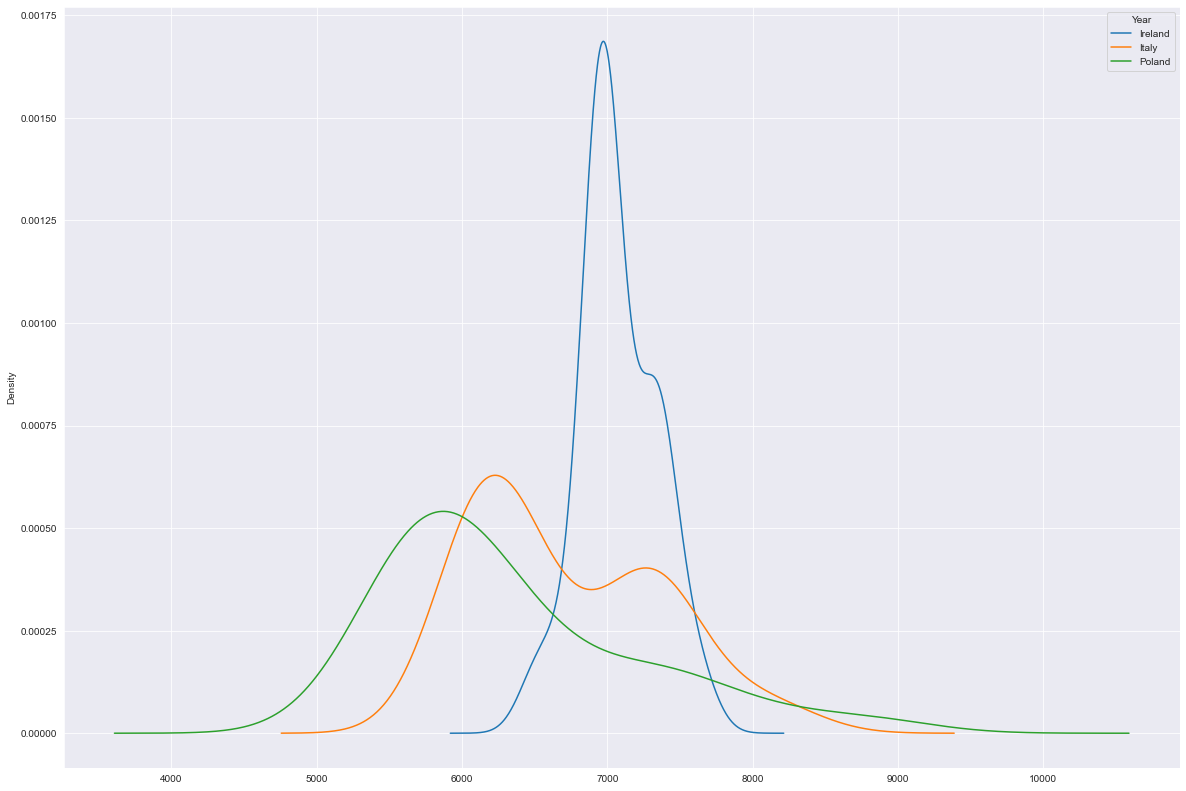

In [588]:
df_world_cattle.plot(y=["Ireland", "Italy","Poland"], kind="kde", figsize=(20, 14))

In [589]:
df_world_cattle_2022 = pd.read_excel('cattle 1991-2022 Europe.xlsx', sheet_name = 'Sheet 1',skiprows=9, usecols = ['TIME','2022'],skipfooter = 8)

C:\Users\krist\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [590]:
c_codes = pd.read_csv("country_codes.tsv", sep="\t")

In [591]:
c_codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [592]:
glimpse(df_world_cattle_2022)

40 rows and 2 columns


,TIME,2022
0,GEO (Labels),NaN
1,European Union - 27 countries (from 2020),:
2,European Union - 28 countries (2013-2020),:
3,European Union - 27 countries (2007-2013),:
4,European Union - 25 countries (2004-2006),:


,TIME,2022
35,United Kingdom,:
36,Montenegro,:
37,North Macedonia,:
38,Albania,:
39,Serbia,:


In [593]:
df_world_cattle_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TIME    40 non-null     object
 1   2022    39 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


In [594]:
df_world_cattle_2022 = df_world_cattle_2022.dropna()

In [595]:
df_world_cattle_2022.head()

,TIME,2022
1,European Union - 27 countries (from 2020),:
2,European Union - 28 countries (2013-2020),:
3,European Union - 27 countries (2007-2013),:
4,European Union - 25 countries (2004-2006),:
5,European Union - 15 countries (1995-2004),:


In [596]:
nan_value = float("NaN")
df_world_cattle_2022 = df_world_cattle_2022.replace(':',nan_value,regex = True)

In [597]:
df_world_cattle_2022.head()

,TIME,2022
1,European Union - 27 countries (from 2020),NaN
2,European Union - 28 countries (2013-2020),NaN
3,European Union - 27 countries (2007-2013),NaN
4,European Union - 25 countries (2004-2006),NaN
5,European Union - 15 countries (1995-2004),NaN


In [598]:
df_world_cattle_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    39 non-null     object 
 1   2022    14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 936.0+ bytes


In [599]:
df_world_cattle_2022 = df_world_cattle_2022.dropna()

In [600]:
df_world_cattle_2022

,TIME,2022
6,Belgium,2240.62
9,Denmark,1484.00
10,Germany (until 1990 former territory of the FRG),10986.30
12,Ireland,7396.15
14,Spain,6753.70
15,France,17415.61
17,Italy,6086.97
24,Netherlands,3766.14
25,Austria,1842.17
26,Poland,6444.09


In [601]:
df_world_cattle_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    14 non-null     object 
 1   2022    14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


In [602]:
df_world_cattle_2022.rename(columns = {'TIME':'Country'}, inplace = True)

In [603]:
#convert in strings and remove special characters
df_world_cattle_2022['Country'] = df_world_cattle_2022['Country'].astype(str)
df_world_cattle_2022['Country'] = df_world_cattle_2022['Country'].str.replace('[#,@,:,-,-,_,"  "."   "," ",&]', '',regex = True)

In [604]:
df_world_cattle_2022['Country'] = df_world_cattle_2022['Country'].replace(['Germany(until1990formerterritoryoftheFRG)'], 
                                                                          'Germany')


In [605]:
df_world_cattle_2022

,Country,2022
6,Belgium,2240.62
9,Denmark,1484.00
10,Germany,10986.30
12,Ireland,7396.15
14,Spain,6753.70
15,France,17415.61
17,Italy,6086.97
24,Netherlands,3766.14
25,Austria,1842.17
26,Poland,6444.09


In [606]:
df_world_cattle_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 34
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  14 non-null     object 
 1   2022     14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


In [607]:
df_world_cattle_2022 = pd.merge(df_world_cattle_2022, c_codes, how="left", on=["Country"])

In [608]:
df_world_cattle_2022

,Country,2022,Alpha-2 code,Alpha-3 code,Numeric
0,Belgium,2240.62,BE,BEL,56
1,Denmark,1484.00,DK,DNK,208
2,Germany,10986.30,DE,DEU,276
3,Ireland,7396.15,IE,IRL,372
4,Spain,6753.70,ES,ESP,724
5,France,17415.61,FR,FRA,250
6,Italy,6086.97,IT,ITA,380
7,Netherlands,3766.14,NL,NLD,528
8,Austria,1842.17,AT,AUT,40
9,Poland,6444.09,PL,POL,616


In [609]:
df_world_cattle_2022.isna().sum().sum()

0

In [610]:
df_world_cattle_2022

,Country,2022,Alpha-2 code,Alpha-3 code,Numeric
0,Belgium,2240.62,BE,BEL,56
1,Denmark,1484.00,DK,DNK,208
2,Germany,10986.30,DE,DEU,276
3,Ireland,7396.15,IE,IRL,372
4,Spain,6753.70,ES,ESP,724
5,France,17415.61,FR,FRA,250
6,Italy,6086.97,IT,ITA,380
7,Netherlands,3766.14,NL,NLD,528
8,Austria,1842.17,AT,AUT,40
9,Poland,6444.09,PL,POL,616


In [611]:
df_world_cattle_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       14 non-null     object 
 1   2022          14 non-null     float64
 2   Alpha-2 code  14 non-null     object 
 3   Alpha-3 code  14 non-null     object 
 4   Numeric       14 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 672.0+ bytes


In [612]:
df_world_cattle_2022.dtypes

Country          object
2022            float64
Alpha-2 code     object
Alpha-3 code     object
Numeric           int64
dtype: object

In [613]:
df_world_cattle_2022

,Country,2022,Alpha-2 code,Alpha-3 code,Numeric
0,Belgium,2240.62,BE,BEL,56
1,Denmark,1484.00,DK,DNK,208
2,Germany,10986.30,DE,DEU,276
3,Ireland,7396.15,IE,IRL,372
4,Spain,6753.70,ES,ESP,724
5,France,17415.61,FR,FRA,250
6,Italy,6086.97,IT,ITA,380
7,Netherlands,3766.14,NL,NLD,528
8,Austria,1842.17,AT,AUT,40
9,Poland,6444.09,PL,POL,616


In [614]:
fig = px.choropleth(
df_world_cattle_2022,
    locations="Alpha-3 code",
    color= "2022",
    hover_name = "Country",
    color_continuous_scale = px.colors.sequential.Plasma
)
fig.update_layout(title_text = "Volume in Cattle 2022",
                 geo_scope = "europe")
fig.update_geos(fitbounds="locations")
fig.show()

In [615]:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=df_world_cattle.Ireland, b=df_world_cattle.Italy, alternative="two-sided", equal_var=True)

Ttest_indResult(statistic=2.878595782560524, pvalue=0.005474453860152021)

In [616]:
# Perform the two-sample t-test with equal variances:
stats.mannwhitneyu(x=df_world_cattle.Ireland, y=df_world_cattle.Italy, method="exact")

MannwhitneyuResult(statistic=703.0, pvalue=0.009863088863688653)

In [617]:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=df_world_cattle.Ireland, b=df_world_cattle.Poland)

Ttest_indResult(statistic=4.579364613818028, pvalue=2.301144928383887e-05)

In [618]:
# Perform the two-sample t-test with equal variances:
stats.mannwhitneyu(x=df_world_cattle.Ireland, y=df_world_cattle.Poland, method="exact")

MannwhitneyuResult(statistic=818.0, pvalue=2.0377166614805518e-05)

In [619]:
stats.ks_2samp(df_world_cattle.Ireland,df_world_cattle.Italy)

KstestResult(statistic=0.53125, pvalue=0.0001740880699963639)

In [620]:
stats.ks_2samp(df_world_cattle.Ireland,df_world_cattle.Poland)

KstestResult(statistic=0.71875, pvalue=3.00559006036391e-08)

# Interactive Dashboard

In [621]:
idf_world_cattle

,Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,Belgium,3264.16,3222.00,3231.07,3251.96,3286.18,3242.60,3157.00,3089.91,3085.17,...,2432.53,2520.77,2531.08,2554.76,2454.10,2449.74,2406.17,2387.91,2353.42,2240.62
9,Denmark,2222.00,2190.00,2195.00,2106.00,2089.00,2094.00,2003.00,1977.00,1887.00,...,1603.00,1585.00,1568.00,1583.00,1565.00,1560.00,1512.00,1517.00,1503.00,1484.00
10,Germany (until 1990 former territory of the FRG),18455.63,16775.48,16150.72,16022.86,16097.87,15965.01,15612.23,15169.75,14895.81,...,12587.02,12702.05,12653.07,12563.18,12365.50,12093.38,11763.43,11423.46,11176.24,10986.30
12,Ireland,6911.90,6951.30,6981.70,6996.40,7033.90,7313.60,7532.70,7640.10,7387.10,...,6902.65,6926.10,6963.52,7221.20,7363.50,7348.50,7208.62,7314.43,7358.88,7396.15
14,Spain,5328.90,5107.27,5044.27,5202.67,5614.00,5947.00,5950.00,6249.00,6163.00,...,5821.97,6008.26,6233.86,6451.22,6588.11,6724.58,6721.90,6714.97,6922.95,6753.70
15,France,21937.00,21597.00,21190.00,21242.00,21241.20,21626.00,20887.00,20713.00,20494.00,...,19179.20,19285.60,19462.90,19559.30,19432.72,18736.99,18469.77,18200.48,17862.57,17415.61
17,Italy,8228.90,7970.40,7568.00,7533.00,7273.00,7361.00,7309.00,7333.00,7261.00,...,6052.85,6197.10,6146.32,6183.18,6118.29,6170.29,6016.06,6115.87,6173.66,6086.97
24,Netherlands,5062.07,4923.86,4796.00,4717.00,4657.00,4552.00,4411.00,4277.00,4178.00,...,4000.00,4068.00,4133.85,4244.52,4096.11,3897.13,3749.97,3766.30,3731.75,3766.14
26,Poland,8844.00,8221.40,7642.60,7695.70,7305.60,7136.50,7307.40,6955.30,6555.00,...,5859.54,5920.41,5960.69,5939.00,6143.00,6201.00,6358.00,6344.00,6401.00,6444.09


In [622]:
idf_world_cattle.rename(columns = {'Year':'Country'}, inplace = True)

In [623]:
idf_world_cattle

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,Belgium,3264.16,3222.00,3231.07,3251.96,3286.18,3242.60,3157.00,3089.91,3085.17,...,2432.53,2520.77,2531.08,2554.76,2454.10,2449.74,2406.17,2387.91,2353.42,2240.62
9,Denmark,2222.00,2190.00,2195.00,2106.00,2089.00,2094.00,2003.00,1977.00,1887.00,...,1603.00,1585.00,1568.00,1583.00,1565.00,1560.00,1512.00,1517.00,1503.00,1484.00
10,Germany (until 1990 former territory of the FRG),18455.63,16775.48,16150.72,16022.86,16097.87,15965.01,15612.23,15169.75,14895.81,...,12587.02,12702.05,12653.07,12563.18,12365.50,12093.38,11763.43,11423.46,11176.24,10986.30
12,Ireland,6911.90,6951.30,6981.70,6996.40,7033.90,7313.60,7532.70,7640.10,7387.10,...,6902.65,6926.10,6963.52,7221.20,7363.50,7348.50,7208.62,7314.43,7358.88,7396.15
14,Spain,5328.90,5107.27,5044.27,5202.67,5614.00,5947.00,5950.00,6249.00,6163.00,...,5821.97,6008.26,6233.86,6451.22,6588.11,6724.58,6721.90,6714.97,6922.95,6753.70
15,France,21937.00,21597.00,21190.00,21242.00,21241.20,21626.00,20887.00,20713.00,20494.00,...,19179.20,19285.60,19462.90,19559.30,19432.72,18736.99,18469.77,18200.48,17862.57,17415.61
17,Italy,8228.90,7970.40,7568.00,7533.00,7273.00,7361.00,7309.00,7333.00,7261.00,...,6052.85,6197.10,6146.32,6183.18,6118.29,6170.29,6016.06,6115.87,6173.66,6086.97
24,Netherlands,5062.07,4923.86,4796.00,4717.00,4657.00,4552.00,4411.00,4277.00,4178.00,...,4000.00,4068.00,4133.85,4244.52,4096.11,3897.13,3749.97,3766.30,3731.75,3766.14
26,Poland,8844.00,8221.40,7642.60,7695.70,7305.60,7136.50,7307.40,6955.30,6555.00,...,5859.54,5920.41,5960.69,5939.00,6143.00,6201.00,6358.00,6344.00,6401.00,6444.09


In [624]:
#convert in strings and remove special characters
idf_world_cattle['Country'] = idf_world_cattle['Country'].astype(str)
idf_world_cattle['Country'] = idf_world_cattle['Country'].str.replace('[#,@,:,-,-,_,"  "."   "," ",&]', '',regex = True)

In [625]:
idf_world_cattle['Country'] = idf_world_cattle['Country'].replace(['Germany(until1990formerterritoryoftheFRG)'], 
                                                                          'Germany')


In [626]:
idf_world_cattle

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,Belgium,3264.16,3222.00,3231.07,3251.96,3286.18,3242.60,3157.00,3089.91,3085.17,...,2432.53,2520.77,2531.08,2554.76,2454.10,2449.74,2406.17,2387.91,2353.42,2240.62
9,Denmark,2222.00,2190.00,2195.00,2106.00,2089.00,2094.00,2003.00,1977.00,1887.00,...,1603.00,1585.00,1568.00,1583.00,1565.00,1560.00,1512.00,1517.00,1503.00,1484.00
10,Germany,18455.63,16775.48,16150.72,16022.86,16097.87,15965.01,15612.23,15169.75,14895.81,...,12587.02,12702.05,12653.07,12563.18,12365.50,12093.38,11763.43,11423.46,11176.24,10986.30
12,Ireland,6911.90,6951.30,6981.70,6996.40,7033.90,7313.60,7532.70,7640.10,7387.10,...,6902.65,6926.10,6963.52,7221.20,7363.50,7348.50,7208.62,7314.43,7358.88,7396.15
14,Spain,5328.90,5107.27,5044.27,5202.67,5614.00,5947.00,5950.00,6249.00,6163.00,...,5821.97,6008.26,6233.86,6451.22,6588.11,6724.58,6721.90,6714.97,6922.95,6753.70
15,France,21937.00,21597.00,21190.00,21242.00,21241.20,21626.00,20887.00,20713.00,20494.00,...,19179.20,19285.60,19462.90,19559.30,19432.72,18736.99,18469.77,18200.48,17862.57,17415.61
17,Italy,8228.90,7970.40,7568.00,7533.00,7273.00,7361.00,7309.00,7333.00,7261.00,...,6052.85,6197.10,6146.32,6183.18,6118.29,6170.29,6016.06,6115.87,6173.66,6086.97
24,Netherlands,5062.07,4923.86,4796.00,4717.00,4657.00,4552.00,4411.00,4277.00,4178.00,...,4000.00,4068.00,4133.85,4244.52,4096.11,3897.13,3749.97,3766.30,3731.75,3766.14
26,Poland,8844.00,8221.40,7642.60,7695.70,7305.60,7136.50,7307.40,6955.30,6555.00,...,5859.54,5920.41,5960.69,5939.00,6143.00,6201.00,6358.00,6344.00,6401.00,6444.09


In [627]:
# Make DataFrame Pipeline Interactive
idf_world_cattle = idf_world_cattle.melt(id_vars=["Country"], 
        var_name="Year", 
        value_name="Cattle Volume")

In [628]:
idf_world_cattle

,Country,Year,Cattle Volume
0,Belgium,1991,3264.16
1,Denmark,1991,2222.00
2,Germany,1991,18455.63
3,Ireland,1991,6911.90
4,Spain,1991,5328.90
...,...,...,...
283,Spain,2022,6753.70
284,France,2022,17415.61
285,Italy,2022,6086.97
286,Netherlands,2022,3766.14


In [629]:
idf_world_cattle.dtypes

Country           object
Year              object
Cattle Volume    float64
dtype: object

In [630]:
idf_world_cattle['Year'] = idf_world_cattle['Year'].astype(int)

In [631]:
idf_world_cattle.dtypes

Country           object
Year               int32
Cattle Volume    float64
dtype: object

In [632]:
chordf_world_cattle = idf_world_cattle

In [633]:
# Make DataFrame Pipeline Interactive
idf_world_cattle = idf_world_cattle.interactive()

In [634]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=1990, end=2022, step=1, value=2005)
year_slider

IntSlider(end=2022, name='Year slider', start=1990, value=2005)

In [635]:
# Radio buttons for CO2 measures
yaxis_qty = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Cattle Volume'],
    button_type='success'
)

In [636]:
countries = ['Belgium', 'Denmark', 'Germany', 'Ireland', 'Spain', 'France', 'Italy',
       'Netherlands', 'Poland']

qty_pipeline = (
    idf_world_cattle[
        (idf_world_cattle.Year <= year_slider) &
        (idf_world_cattle.Country.isin(countries))
    ]
    .groupby(['Country', 'Year'])[yaxis_qty].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')  
    .reset_index(drop=True)
)

In [637]:
qty_pipeline

In [638]:
qty_plot = qty_pipeline.hvplot(x = 'Year', by='Country', y=yaxis_qty,line_width=2, title="Cattle Volume by country in Europe")
qty_plot

## (2) Europe Cattle Volume Choropleth

In [639]:
chordf_world_cattle

,Country,Year,Cattle Volume
0,Belgium,1991,3264.16
1,Denmark,1991,2222.00
2,Germany,1991,18455.63
3,Ireland,1991,6911.90
4,Spain,1991,5328.90
...,...,...,...
283,Spain,2022,6753.70
284,France,2022,17415.61
285,Italy,2022,6086.97
286,Netherlands,2022,3766.14


In [640]:
chordf_world_cattle = pd.merge(chordf_world_cattle, c_codes, how="left", on=["Country"])

In [641]:
chordf_world_cattle

,Country,Year,Cattle Volume,Alpha-2 code,Alpha-3 code,Numeric
0,Belgium,1991,3264.16,BE,BEL,56
1,Denmark,1991,2222.00,DK,DNK,208
2,Germany,1991,18455.63,DE,DEU,276
3,Ireland,1991,6911.90,IE,IRL,372
4,Spain,1991,5328.90,ES,ESP,724
...,...,...,...,...,...,...
283,Spain,2022,6753.70,ES,ESP,724
284,France,2022,17415.61,FR,FRA,250
285,Italy,2022,6086.97,IT,ITA,380
286,Netherlands,2022,3766.14,NL,NLD,528


In [642]:

fig2 = px.choropleth(
chordf_world_cattle,
    locations="Alpha-3 code",
    color= "Cattle Volume",
    hover_name = "Country",
    color_continuous_scale = px.colors.sequential.Plasma,
    animation_frame = "Year", width = 1000, height = 500
)
fig2.update_layout(title_text = "Cattle Volume in Europe",
                 geo_scope = "europe")
fig2.update_geos(fitbounds="locations")
fig2.show()



## (3) CO2 vs GDP scatterplot

In [643]:
idf_Ire_cattle = df_Ire_cattle

In [644]:
idf_Ire_cattle

,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West,x0_Bulls,x0_Cattle: 1-2 years,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows
0,Border,Dairy cows,1991,137.0,8.916,1140.468,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Border,Other cows,1991,164.5,8.916,1140.468,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Border,Bulls,1991,2.9,8.916,1140.468,1,0,0,0,0,0,0,1,0,0,0,0,0
3,Border,Cattle: 2 years and over,1991,128.8,8.916,1140.468,1,0,0,0,0,0,0,0,0,1,0,0,0
4,Border,Cattle: 1-2 years,1991,215.7,8.916,1140.468,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Midland,Other cows,2021,117.8,9.745,955.885,0,0,0,1,0,0,0,0,0,0,0,0,1
1298,Midland,Bulls,2021,5.6,9.745,955.885,0,0,0,1,0,0,0,1,0,0,0,0,0
1299,Midland,Cattle: 2 years and over,2021,104.6,9.745,955.885,0,0,0,1,0,0,0,0,0,1,0,0,0
1300,Midland,Cattle: 1-2 years,2021,257.6,9.745,955.885,0,0,0,1,0,0,0,0,1,0,0,0,0


In [645]:
idfjoin = idf_Ire_cattle.pivot(columns='Type of Cattle')['Quantity']

In [646]:
idfjoin.head()

Type of Cattle,Bulls,Cattle: 1-2 years,Cattle: 2 years and over,Cattle: under 1 year,Dairy cows,Other cows
0,NaN,NaN,NaN,NaN,137.0,NaN
1,NaN,NaN,NaN,NaN,NaN,164.5
2,2.9,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,128.8,NaN,NaN,NaN
4,NaN,215.7,NaN,NaN,NaN,NaN


In [647]:
idf_Ire_cattle = idf_Ire_cattle.join(
    idfjoin,
    lsuffix = "_left",
)

In [648]:
idf_Ire_cattle = idf_Ire_cattle.fillna(0)

idf_Ire_cattle

,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,...,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows,Bulls,Cattle: 1-2 years,Cattle: 2 years and over,Cattle: under 1 year,Dairy cows,Other cows
0,Border,Dairy cows,1991,137.0,8.916,1140.468,1,0,0,0,...,0,0,1,0,0.0,0.0,0.0,0.0,137.0,0.0
1,Border,Other cows,1991,164.5,8.916,1140.468,1,0,0,0,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,164.5
2,Border,Bulls,1991,2.9,8.916,1140.468,1,0,0,0,...,0,0,0,0,2.9,0.0,0.0,0.0,0.0,0.0
3,Border,Cattle: 2 years and over,1991,128.8,8.916,1140.468,1,0,0,0,...,1,0,0,0,0.0,0.0,128.8,0.0,0.0,0.0
4,Border,Cattle: 1-2 years,1991,215.7,8.916,1140.468,1,0,0,0,...,0,0,0,0,0.0,215.7,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Midland,Other cows,2021,117.8,9.745,955.885,0,0,0,1,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,117.8
1298,Midland,Bulls,2021,5.6,9.745,955.885,0,0,0,1,...,0,0,0,0,5.6,0.0,0.0,0.0,0.0,0.0
1299,Midland,Cattle: 2 years and over,2021,104.6,9.745,955.885,0,0,0,1,...,1,0,0,0,0.0,0.0,104.6,0.0,0.0,0.0
1300,Midland,Cattle: 1-2 years,2021,257.6,9.745,955.885,0,0,0,1,...,0,0,0,0,0.0,257.6,0.0,0.0,0.0,0.0


In [649]:
idf_Ire_cattle = idf_Ire_cattle.interactive()

In [650]:
# Radio buttons for CO2 measures
yaxis_type = pn.widgets.RadioButtonGroup(
    name='yaxis', 
    options=['Dairy cows', 'Other cows', 'Bulls', 'Cattle: 2 years and over',
       'Cattle: 1-2 years', 'Cattle: under 1 year'],
    button_type='success'
)

In [651]:
Regions = ['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West']

type_pipeline = (
    idf_Ire_cattle[
        (idf_Ire_cattle.Year <= year_slider) &
        (idf_Ire_cattle.Region.isin(Regions))
    ]
    .groupby(['Region', 'Year'])[yaxis_type].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')  
    .reset_index(drop=True)
)

In [652]:
type_pipeline

In [653]:
type_plot = type_pipeline.hvplot(x = 'Year', by='Region', y=yaxis_type,line_width=2, title="Cattle Volume by Region in Ireland")
type_plot


In [654]:
type_table = type_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 

## Creating Dashboard

In [655]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Cattle Volume in Ireland and Europe from 1991-2022', 
    sidebar=[pn.pane.Markdown("# Cattle Volume in Ireland and Europe from 1991-2022"), 
             pn.pane.PNG('cattle.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_qty, 
                           qty_plot.panel(width=1000, height = 400), margin=(0,25)), 
                 fig2),
          pn.Row(pn.Column(yaxis_type,type_plot.panel(width=1000, height = 400), margin=(0,25)),
                pn.Column(type_table.panel(width=1000, height = 400), margin=(0,25)))],
    accent_base_color="#f5aa20",
    header_background="#f5aa20",
)
template.show(threaded=True)
#template.servable();

<StoppableThread(Thread-7, started 24480)>

Launching server at http://localhost:50645
